### Import statements

In [1]:
from netCDF4 import Dataset
import wrf
from wrf import getvar, ALL_TIMES, latlon_coords, CoordPair, vertcross, to_np, interpline
import xarray as xr
import numpy as np
import cartopy.crs as crs
from matplotlib.cm import get_cmap
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import matplotlib as mpl
import pandas as pd
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from metpy.units import units
from metpy.plots import SkewT
from matplotlib import gridspec

### Importing datasets

In [2]:
# Function to import files

def dataset_files(setup, run_no, year, file = True):
    year_dict = {
        2017: ['16_00', '15_23', '15_22', '15_21', '15_20', '2017-02'],
        2018: ['18_00', '17_23', '17_22', '17_21', '17_20', '2018-12'],
        2020: ['15_00', '14_23', '14_22', '14_21', '14_20', '2020-12'],
        2024: ['11_00', '10_23', '10_22', '10_21', '10_20', '2024-02'],
    }
    if file:
        t = year_dict[year][run_no-1]
        t_ind = int(t[0:2])
        t2 = str(t_ind+1)+t[2:]
        t3 = str(t_ind+2)+t[2:]
        if run_no == 1:
            dat = [Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t2}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t2}:10:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}/wrfout_d02_{year_dict[year][5]}-{t3}:10:00')]
        else:
            hour = t[3:5]
            dat = [Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t2}:00:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t2}:10:00'),
            Dataset(f'/g/data/li18/em3807_2/WRF_runs/{setup}_{year}_{str(run_no)}/wrfout_d02_{year_dict[year][5]}-{t3}:10:00')]
        return(dat)
    else:
        if run_no == 1:
            dat = Dataset(f'/g/data/li18/em3807_2/WRF_runs/extracted_data/{setup}_{year}_subset.nc')
        else:
            dat = Dataset(f'/g/data/li18/em3807_2/WRF_runs/extracted_data/{setup}_{year}_{run_no}_subset.nc')
        return(dat)

# 2017

data_17_crop = dataset_files('Cropland', 1, 2017)
data_17_crop_2 = dataset_files('Cropland', 2, 2017)
data_17_crop_3 = dataset_files('Cropland', 3, 2017)
data_17_crop_4 = dataset_files('Cropland', 4, 2017)
data_17_crop_5 = dataset_files('Cropland', 5, 2017)

data_17_noeuro = dataset_files('Pre_Euro', 1, 2017, file = False)
data_17_noeuro_2 = dataset_files('Pre_Euro', 2, 2017, file = False)
data_17_noeuro_3 = dataset_files('Pre_Euro', 3, 2017, file = False)
data_17_noeuro_4 = dataset_files('Pre_Euro', 4, 2017, file = False)
data_17_noeuro_5 = dataset_files('Pre_Euro', 5, 2017, file = False)

data_17_nat = dataset_files('Natland', 1, 2017, file = False)
data_17_nat_2 = dataset_files('Natland', 2, 2017, file = False)
data_17_nat_3 = dataset_files('Natland', 3, 2017, file = False)
data_17_nat_4 = dataset_files('Natland', 4, 2017, file = False)
data_17_nat_5 = dataset_files('Natland', 5, 2017, file = False)

data_17_def = dataset_files('NoUCM_WRFDef', 1, 2017, file = False)
data_17_def_2 = dataset_files('NoUCM_WRFDef', 2, 2017, file = False)
data_17_def_3 = dataset_files('NoUCM_WRFDef', 3, 2017, file = False)
data_17_def_4 = dataset_files('NoUCM_WRFDef', 4, 2017, file = False)
data_17_def_5 = dataset_files('NoUCM_WRFDef', 5, 2017, file = False)

data_17_defurb = dataset_files('BEPBEM_WRFDef', 1, 2017, file = False)
data_17_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2017, file = False)
data_17_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2017, file = False)
data_17_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2017, file = False)
data_17_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2017, file = False)

data_17_grurb = dataset_files('BEPBEM_GrUrban', 1, 2017, file = False)
data_17_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2017, file = False)
data_17_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2017, file = False)
data_17_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2017, file = False)
data_17_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2017, file = False)

data_17_gr = dataset_files('NoUCM_GrUrban', 1, 2017, file = False)
data_17_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2017, file = False)
data_17_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2017, file = False)
data_17_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2017, file = False)
data_17_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2017, file = False)

# 2018

data_18_crop = dataset_files('Cropland', 1, 2018)
data_18_crop_2 = dataset_files('Cropland', 2, 2018)
data_18_crop_3 = dataset_files('Cropland', 3, 2018)
data_18_crop_4 = dataset_files('Cropland', 4, 2018)
data_18_crop_5 = dataset_files('Cropland', 5, 2018, file = False)

data_18_noeuro = dataset_files('Pre_Euro', 1, 2018, file = False)
data_18_noeuro_2 = dataset_files('Pre_Euro', 2, 2018, file = False)
data_18_noeuro_3 = dataset_files('Pre_Euro', 3, 2018, file = False)
data_18_noeuro_4 = dataset_files('Pre_Euro', 4, 2018, file = False)
data_18_noeuro_5 = dataset_files('Pre_Euro', 5, 2018, file = False)

data_18_nat = dataset_files('Natland', 1, 2018, file = False)
data_18_nat_2 = dataset_files('Natland', 2, 2018, file = False)
data_18_nat_3 = dataset_files('Natland', 3, 2018, file = False)
data_18_nat_4 = dataset_files('Natland', 4, 2018, file = False)
data_18_nat_5 = dataset_files('Natland', 5, 2018, file = False)

data_18_def = dataset_files('NoUCM_WRFDef', 1, 2018, file = False)
data_18_def_2 = dataset_files('NoUCM_WRFDef', 2, 2018, file = False)
data_18_def_3 = dataset_files('NoUCM_WRFDef', 3, 2018, file = False)
data_18_def_4 = dataset_files('NoUCM_WRFDef', 4, 2018, file = False)
data_18_def_5 = dataset_files('NoUCM_WRFDef', 5, 2018, file = False)

data_18_defurb = dataset_files('BEPBEM_WRFDef', 1, 2018, file = False)
data_18_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2018, file = False)
data_18_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2018, file = False)
data_18_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2018)
# data_18_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2018, file = False)
data_18_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2018, file = False)

data_18_grurb = dataset_files('BEPBEM_GrUrban', 1, 2018, file = False)
data_18_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2018, file = False)
data_18_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2018, file = False)
data_18_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2018, file = False)
data_18_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2018, file = False)

data_18_gr = dataset_files('NoUCM_GrUrban', 1, 2018, file = False)
data_18_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2018, file = False)
data_18_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2018, file = False)
data_18_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2018, file = False)
data_18_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2018, file = False)

# 2020

data_20_crop = dataset_files('Cropland', 1, 2020)
data_20_crop_2 = dataset_files('Cropland', 2, 2020)
data_20_crop_3 = dataset_files('Cropland', 3, 2020)
data_20_crop_4 = dataset_files('Cropland', 4, 2020)
data_20_crop_5 = dataset_files('Cropland', 5, 2020)

data_20_noeuro = dataset_files('Pre_Euro', 1, 2020, file = False)
data_20_noeuro_2 = dataset_files('Pre_Euro', 2, 2020, file = False)
data_20_noeuro_3 = dataset_files('Pre_Euro', 3, 2020, file = False)
data_20_noeuro_4 = dataset_files('Pre_Euro', 4, 2020, file = False)
data_20_noeuro_5 = dataset_files('Pre_Euro', 5, 2020, file = False)

data_20_nat = dataset_files('Natland', 1, 2020, file = False)
data_20_nat_2 = dataset_files('Natland', 2, 2020, file = False)
data_20_nat_3 = dataset_files('Natland', 3, 2020, file = False)
data_20_nat_4 = dataset_files('Natland', 4, 2020, file = False)
data_20_nat_5 = dataset_files('Natland', 5, 2020, file = False)

data_20_def = dataset_files('NoUCM_WRFDef', 1, 2020, file = False)
data_20_def_2 = dataset_files('NoUCM_WRFDef', 2, 2020, file = False)
data_20_def_3 = dataset_files('NoUCM_WRFDef', 3, 2020, file = False)
data_20_def_4 = dataset_files('NoUCM_WRFDef', 4, 2020, file = False)
data_20_def_5 = dataset_files('NoUCM_WRFDef', 5, 2020, file = False)

data_20_defurb = dataset_files('BEPBEM_WRFDef', 1, 2020, file = False)
data_20_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2020, file = False)
data_20_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2020, file = False)
data_20_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2020, file = False)
data_20_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2020, file = False)

data_20_grurb = dataset_files('BEPBEM_GrUrban', 1, 2020, file = False)
data_20_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2020, file = False)
data_20_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2020, file = False)
data_20_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2020, file = False)
data_20_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2020, file = False)

data_20_gr = dataset_files('NoUCM_GrUrban', 1, 2020, file = False)
data_20_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2020, file = False)
data_20_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2020, file = False)
data_20_gr_4 = dataset_files('NoUCM_GrUrban', 4, 2020, file = False)
data_20_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2020, file = False)

# 2024

data_24_crop = dataset_files('Cropland', 1, 2024)
data_24_crop_2 = dataset_files('Cropland', 2, 2024)
data_24_crop_3 = dataset_files('Cropland', 3, 2024)
data_24_crop_4 = dataset_files('Cropland', 4, 2024)
data_24_crop_5 = dataset_files('Cropland', 5, 2024)

data_24_noeuro = dataset_files('Pre_Euro', 1, 2024,)
data_24_noeuro_2 = dataset_files('Pre_Euro', 2, 2024, file = False)
data_24_noeuro_3 = dataset_files('Pre_Euro', 3, 2024, file = False)
data_24_noeuro_4 = dataset_files('Pre_Euro', 4, 2024, file = False)
data_24_noeuro_5 = dataset_files('Pre_Euro', 5, 2024, file = False)

data_24_nat = dataset_files('Natland', 1, 2024)
data_24_nat_2 = dataset_files('Natland', 2, 2024)
data_24_nat_3 = dataset_files('Natland', 3, 2024)
data_24_nat_4 = dataset_files('Natland', 4, 2024)
data_24_nat_5 = dataset_files('Natland', 5, 2024)

data_24_def = dataset_files('NoUCM_WRFDef', 1, 2024)
data_24_def_2 = dataset_files('NoUCM_WRFDef', 2, 2024)
data_24_def_3 = dataset_files('NoUCM_WRFDef', 3, 2024)
data_24_def_4 = dataset_files('NoUCM_WRFDef', 4, 2024)
data_24_def_5 = dataset_files('NoUCM_WRFDef', 5, 2024)

data_24_defurb = dataset_files('BEPBEM_WRFDef', 1, 2024)
data_24_defurb_2 = dataset_files('BEPBEM_WRFDef', 2, 2024)
data_24_defurb_3 = dataset_files('BEPBEM_WRFDef', 3, 2024)
data_24_defurb_4 = dataset_files('BEPBEM_WRFDef', 4, 2024)
data_24_defurb_5 = dataset_files('BEPBEM_WRFDef', 5, 2024)

data_24_grurb = dataset_files('BEPBEM_GrUrban', 1, 2024)
data_24_grurb_2 = dataset_files('BEPBEM_GrUrban', 2, 2024)
data_24_grurb_3 = dataset_files('BEPBEM_GrUrban', 3, 2024)
data_24_grurb_4 = dataset_files('BEPBEM_GrUrban', 4, 2024)
data_24_grurb_5 = dataset_files('BEPBEM_GrUrban', 5, 2024)

data_24_gr = dataset_files('NoUCM_GrUrban', 1, 2024)
data_24_gr_2 = dataset_files('NoUCM_GrUrban', 2, 2024)
data_24_gr_3 = dataset_files('NoUCM_GrUrban', 3, 2024)
data_24_gr_4 = [Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-10_21:00:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-10_22:00:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-11_21:10:00'),
Dataset('/g/data/li18/em3807_2/WRF_runs/NoUCM_GrUrban_2024_4/wrfout_d02_2024-02-12_21:10:00')]
data_24_gr_5 = dataset_files('NoUCM_GrUrban', 5, 2024)

### Setting up ensembles

In [5]:
en1_17 = [data_17_crop, data_17_nat, data_17_gr, data_17_grurb, data_17_def, data_17_defurb]
en2_17 = [data_17_crop_2, data_17_nat_2, data_17_gr_2, data_17_grurb_2, data_17_def_2, data_17_defurb_2]
en3_17 = [data_17_crop_3, data_17_nat_3, data_17_gr_3, data_17_grurb_3, data_17_def_3, data_17_defurb_3]
en4_17 = [data_17_crop_4, data_17_nat_4, data_17_gr_4, data_17_grurb_4, data_17_def_4, data_17_defurb_4]
en5_17 = [data_17_crop_5, data_17_nat_5, data_17_gr_5, data_17_grurb_5, data_17_def_5, data_17_defurb_5]

en1_18 = [data_18_crop, data_18_nat, data_18_gr, data_18_grurb, data_18_def, data_18_defurb]
en2_18 = [data_18_crop_2, data_18_nat_2, data_18_gr_2, data_18_grurb_2, data_18_def_2, data_18_defurb_2]
en3_18 = [data_18_crop_3, data_18_nat_3, data_18_gr_3, data_18_grurb_3, data_18_def_3, data_18_defurb_3]
en4_18 = [data_18_crop_4, data_18_nat_4, data_18_gr_4, data_18_grurb_4, data_18_def_4, data_18_defurb_4]
en5_18 = [data_18_crop_5, data_18_nat_5, data_18_gr_5, data_18_grurb_5, data_18_def_5, data_18_defurb_5]

en1_20 = [data_20_crop, data_20_nat, data_20_gr, data_20_grurb, data_20_def, data_20_defurb]
en2_20 = [data_20_crop_2, data_20_nat_2, data_20_gr_2, data_20_grurb_2, data_20_def_2, data_20_defurb_2]
en3_20 = [data_20_crop_3, data_20_nat_3, data_20_gr_3, data_20_grurb_3, data_20_def_3, data_20_defurb_3]
en4_20 = [data_20_crop_4, data_20_nat_4, data_20_gr_4, data_20_grurb_4, data_20_def_4, data_20_defurb_4]
en5_20 = [data_20_crop_5, data_20_nat_5, data_20_gr_5, data_20_grurb_5, data_20_def_5, data_20_defurb_5]

en1_24 = [data_24_crop, data_24_nat, data_24_gr, data_24_grurb, data_24_def, data_24_defurb]
en2_24 = [data_24_crop_2, data_24_nat_2, data_24_gr_2, data_24_grurb_2, data_24_def_2, data_24_defurb_2]
en3_24 = [data_24_crop_3, data_24_nat_3, data_24_gr_3, data_24_grurb_3, data_24_def_3, data_24_defurb_3]
en4_24 = [data_24_crop_4, data_24_nat_4, data_24_gr_4, data_24_grurb_4, data_24_def_4, data_24_defurb_4]
en5_24 = [data_24_crop_5, data_24_nat_5, data_24_gr_5, data_24_grurb_5, data_24_def_5, data_24_defurb_5]

ensemble_dict = { 2017: [en1_17, en2_17, en3_17, en4_17, en5_17],
2018: [en1_18, en2_18, en3_18, en4_18, en5_18],
2020: [en1_20, en2_20, en3_20, en4_20, en5_20],
2024: [en1_24, en2_24, en3_24, en4_24, en5_24]
}

### Defining functions

In [9]:
# Match UTC time to WRF index
def match_tti(dataset, date, time): #match time to index
    timelist = wrf.extract_times(dataset, timeidx = ALL_TIMES)
    if len(time) ==7:
        timestr = str(date)+"T0"+str(time)+".000000000"
    if len(time) ==8:
        timestr = str(date)+"T"+str(time)+".000000000"
    if isinstance(dataset, list):
        for file in dataset:
            if timestr in str(wrf.extract_times(file, timeidx = ALL_TIMES)):
                file_num = dataset.index(file)
    else:
        file_num = ''
    for idx, t in enumerate(timelist):
        if timestr == str(t):
            ind = idx
            break
    else:
        return print('Time not in dataset')
    return(ind,file_num,f'timeidx: {ind} for {t}')

# Convert UTC to AEST
def utc_to_aest(timestr):
    utc = pd.Timestamp(timestr,tz='UTC')
    aus = utc.tz_convert(tz='Australia/Sydney')
    date = str(aus).split(' ')[0]
    time = str(aus).split(' ')[1][:8]
    wrfstr = date+"T"+time+".000000000"
    aest = time+' '+date
    return(wrfstr,aest,f'AEST is {time} {date}')

# Get WRF indexes for specific times across an ensemble
def get_indexes(caselist,start,end): #start date (sd), start hour (sh), end date (ed) and end hour (eh)
    indl = []
    for case in caselist:
        inds = match_tti(case, aest_to_utc(start[0],start[1])[1][0], aest_to_utc(start[0],start[1])[1][1])[0]
        inde = match_tti(case, aest_to_utc(end[0],end[1])[1][0], aest_to_utc(end[0],end[1])[1][1])[0]
        indl.append([inds,inde])
    return indl

# Convect AEST to UTC
def aest_to_utc(date,time):
    datetime = f'{date} {time}'
    austime = pd.Timestamp(datetime,tz='Australia/Sydney')
    utctime = austime.tz_convert(tz='UTC')
    udate = str(utctime).split(' ')[0]
    utime = str(utctime).split(' ')[1][:8] 
    wrfstr = udate+"T"+utime+".000000000"  
    return(wrfstr,[udate, utime])

grid = data_24_gr

# Defining the coastline from the gridded dataset
def gr_coastline():
    grland = wrf.getvar(grid, 'LU_INDEX', timeidx=0, method='cat')
    wat = np.where(grland != 17, 0, grland)
    water = np.where(wat == 17, 1, wat)
    water[0:290, 0:130] = 0 
    water[26:290, 0:156] = 0
    water[26:33, 0:157] = 0 
    water[25:30, 0:156] = 0
    water[47:49, 0:167] = 0
    water[80:160, 0:175] = 0
    water[95:160, 0:177] = 0
    water[120:190, 0:182] = 0
    water[132:190, 0:186] = 0
    water[150:154, 0:203] = 0
    water[168:172, 0:214] = 0
    water[190:210, 0:215] = 0
    water[192:200, 0:218] = 0
    water[210:290, 0:225] = 0
    water[220:290, 0:233] = 0
    water[225:290, 0:236] = 0
    water[230:290, 0:237] = 0
    water[232:290, 0:241] = 0
    water[229:290, 0:237] = 0
    water[242:290, 0:245] = 0
    water[251:290, 0:250] = 0
    water[278:290, 0:266] = 0
    return water

# Defining the urban outline from the gridded dataset
def urb_outline():
    grland = wrf.getvar(grid, 'LU_INDEX', timeidx=0, method='cat')
    urb = np.where(grland <= 49, 0, grland) #set everything that isn't urban to zero
    uniurb = np.where(urb >= 49, 1, urb) #make urban area uniform
    return uniurb

# Define a dictionary to match up storm dates with file names
date_dict = {'13_2024':'13/02/2024', '17_2020':'17/12/2020', '18_2017':'18/02/2017', '20_2018':'20/12/2018'}

# Plots

### Surface hail for individual ensemble members

Starting at 2018-12-20 and ending at 2018-12-21


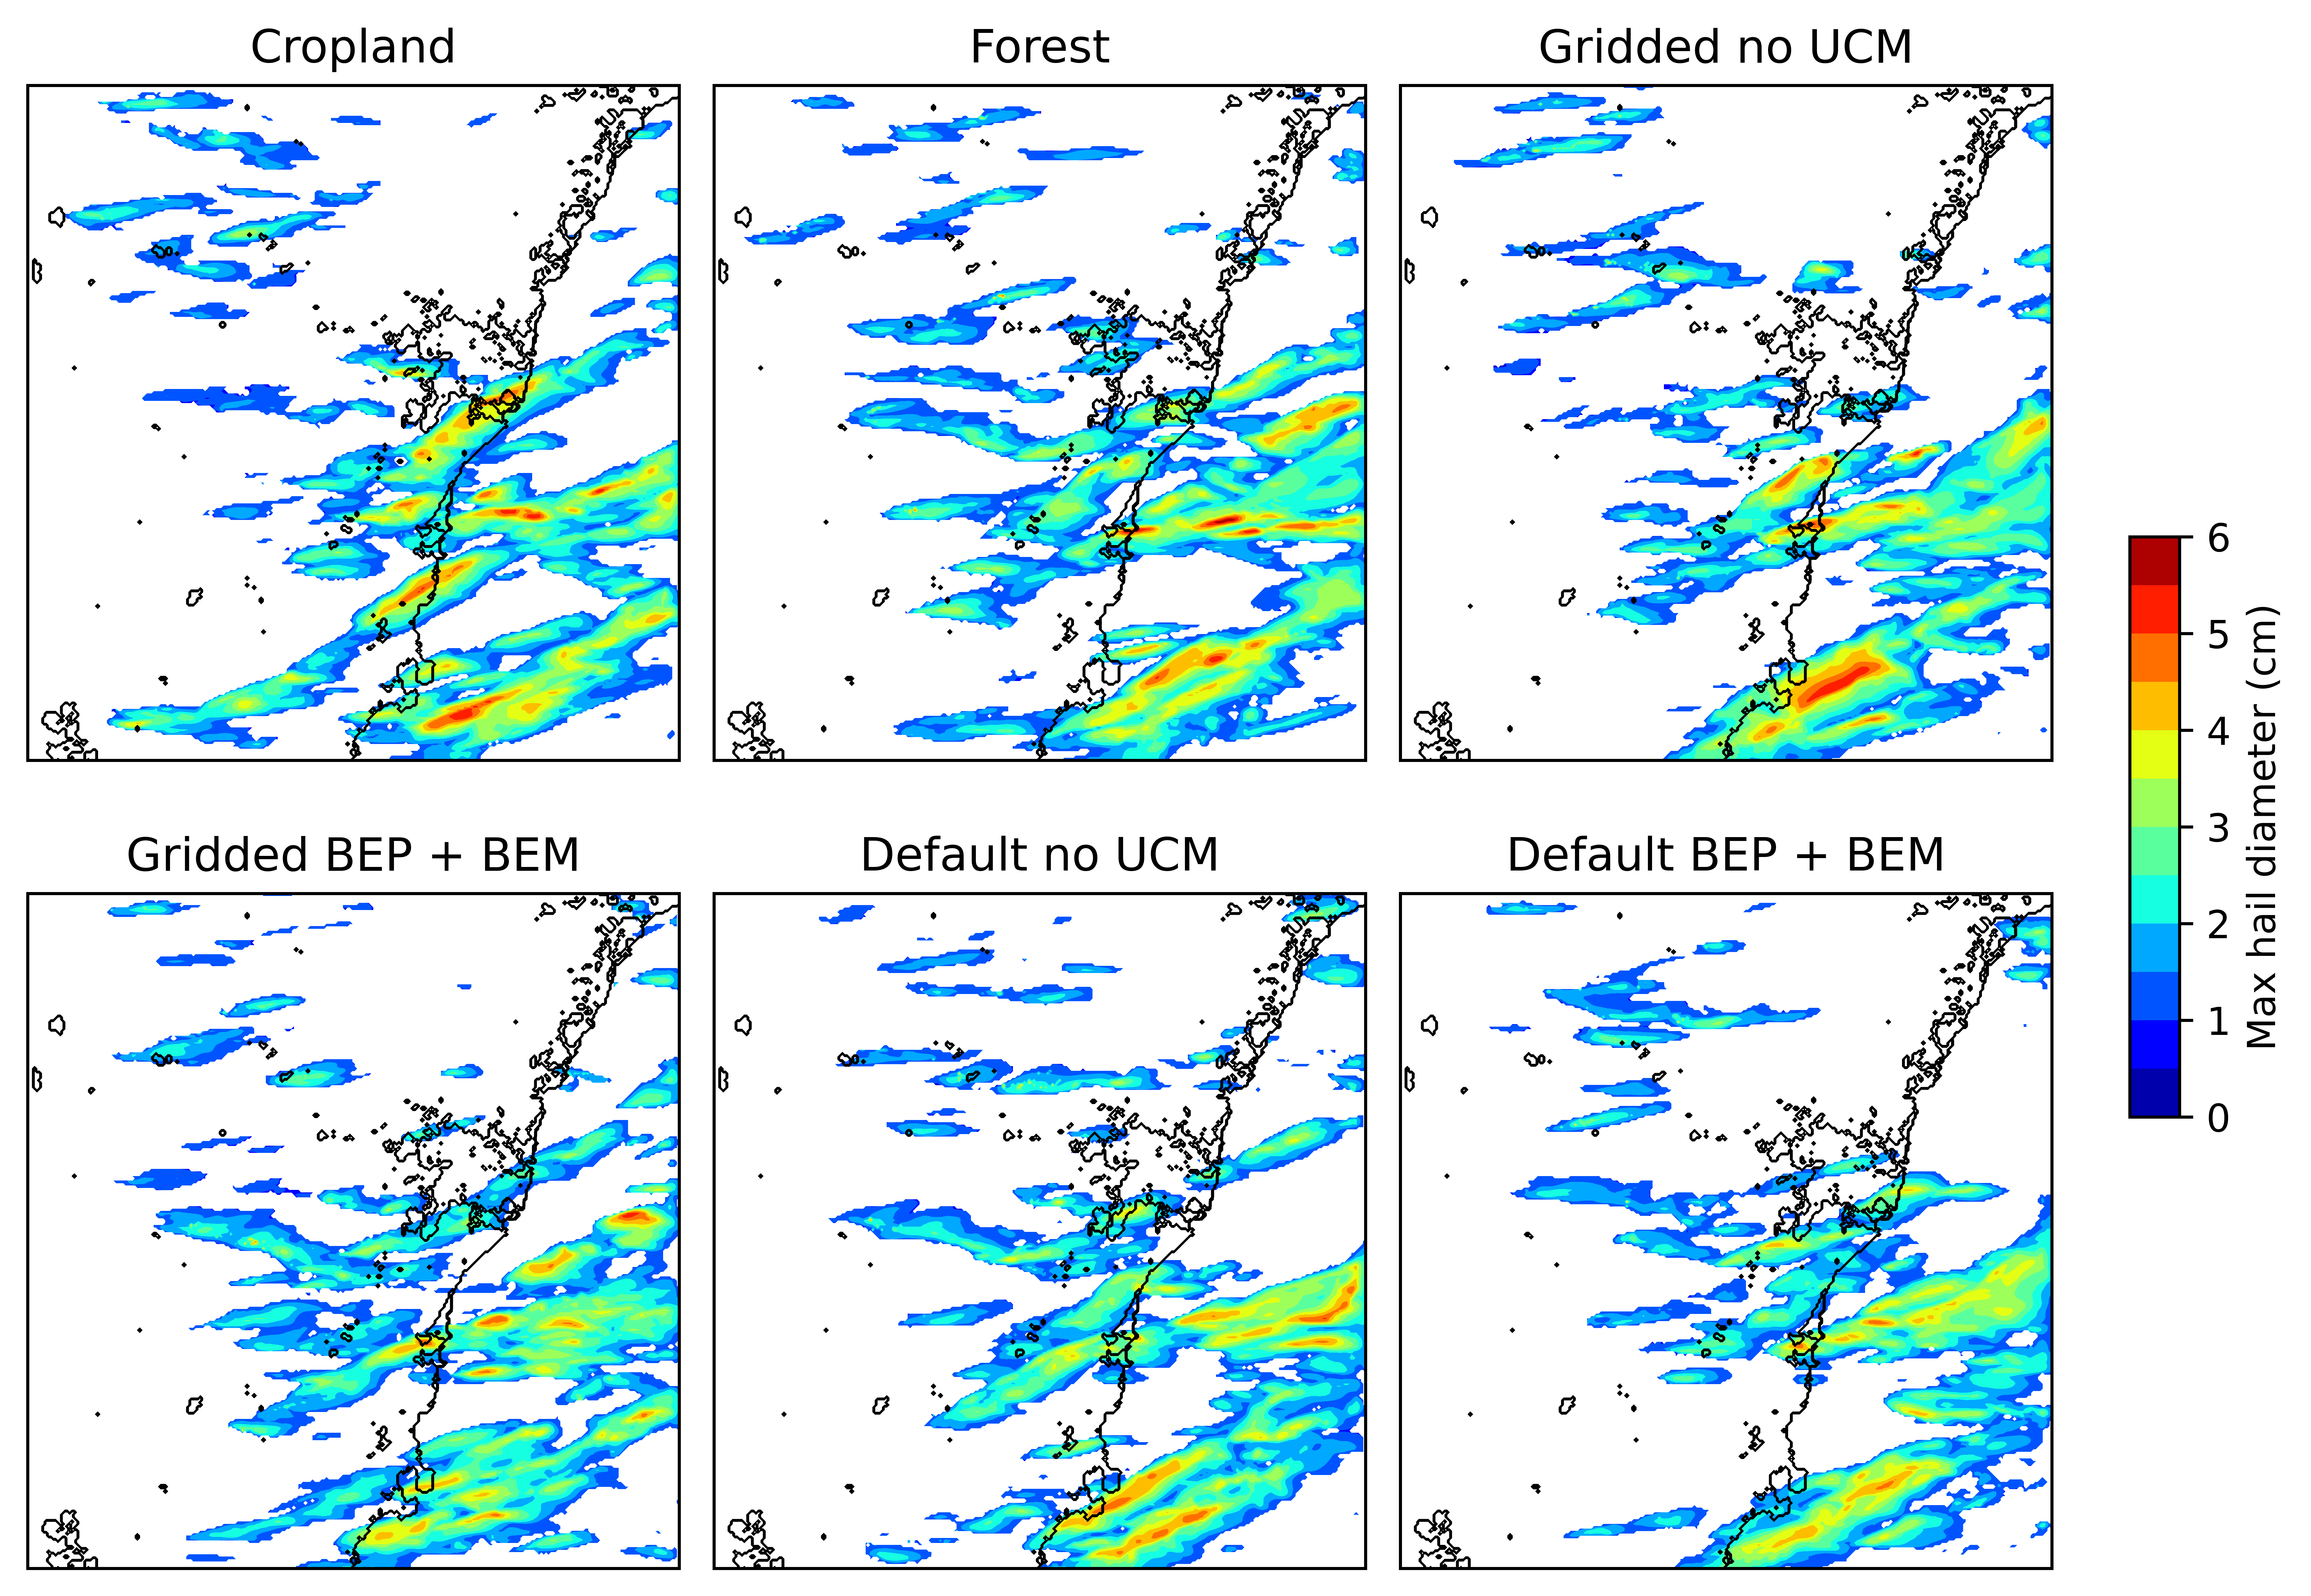

In [ ]:
# Extracting the maximum surface hail size

ensemble_num = 4
storm = 2018

date_dict = {2024:'13/02/2024', 2020:'17/12/2020', 2017:'18/02/2017', 2018:'20/12/2018'}

# Print the storm day start and end times
start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '00:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])+1) #local date
end_hour = '00:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

# Define ensemble and setup names
en = ensemble_dict[storm][ensemble_num - 1]
names = ['Cropland','Forest','Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM' ]

# Extract surface hail
inds = get_indexes(en,[start_date,start_hour],[end_date,end_hour])
hail_list = []

for caseind in range(len(inds)):
    hail = wrf.getvar(en[caseind], 'HAIL_MAXK1', timeidx = ALL_TIMES, method = 'cat')[inds[caseind][0]:inds[caseind][1]+1,:,:].max('Time')*100
    hailmask = np.ma.masked_where(hail <= 0, hail)
    hail_list.append(hailmask)

# Set maximum surface hail size and levels for colourbar
max_hail_size = 6
levels = np.linspace(0, max_hail_size, int(max_hail_size*2+1))

# Extract metadata for plotting
hal = wrf.getvar(en[0], 'HAIL_MAXK1', timeidx=0, method='cat')
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Make figure
fig = plt.figure(figsize=(12,6), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)

ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 1:3], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 3:5], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 5:7], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

# Make black colourmap for urban outline
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Plot hail for each setup
for ind in range(len(hail_list)):
        nat1 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(hail_list[ind]), levels = levels, #vmax=4.0,extend='max',
                 transform=crs.PlateCarree(), cmap=plt.colormaps['jet'])
        axs[ind].set_title(names[ind])
        axs[ind].set_xlim(wrf.cartopy_xlim(hal))
        axs[ind].set_ylim(wrf.cartopy_ylim(hal))
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)

fig.subplots_adjust(right=0.83) # position of the right edge of the subplots
cbar_ax = fig.add_axes([0.75, 0.325, 0.015, 0.35]) #left, bottom, width, height
# cbar = fig.colorbar(nat1, cax=cbar_ax, extend = 'max') # if needed
cbar = fig.colorbar(nat1, cax=cbar_ax)
cbar.set_label("Max hail diameter (cm)")

### Ensemble-averaged surface hail

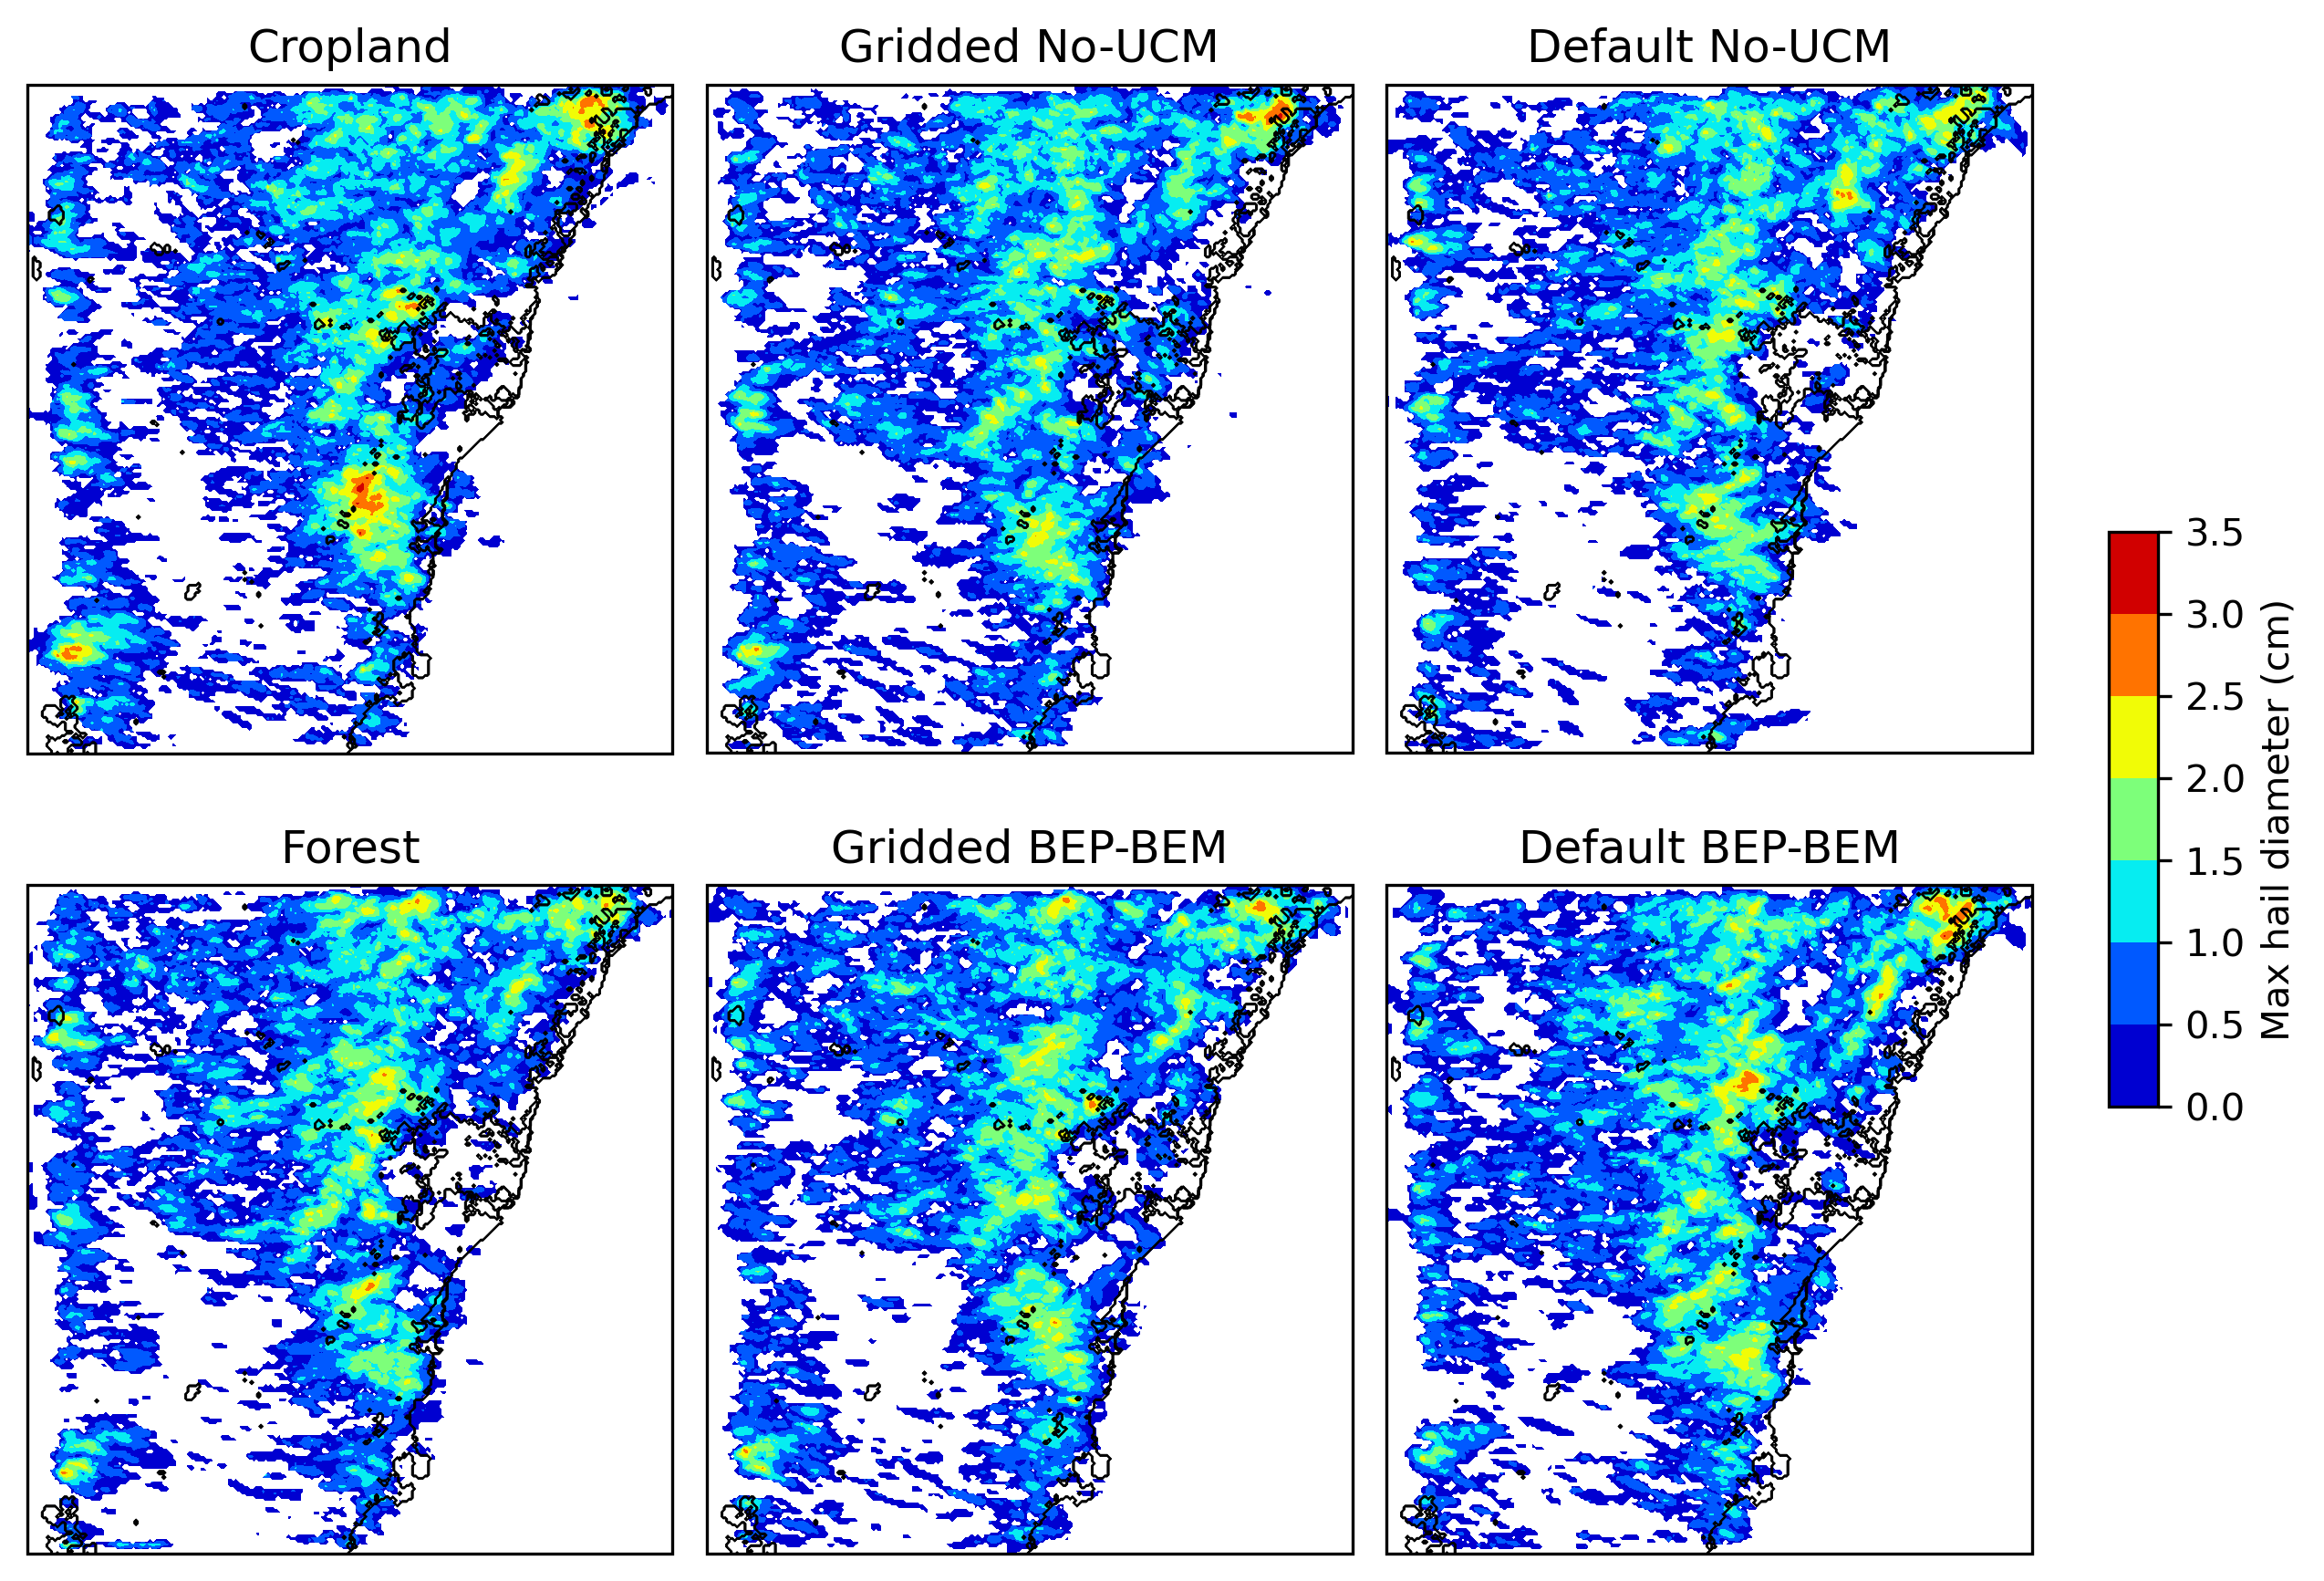

In [ ]:
# Select average surface hail for a specific storm
date = '17_2020'
avg_crop = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_crop_{date}.nc')['HAIL_MAXK1']
avg_noeuro = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_noeuro_{date}.nc')['HAIL_MAXK1']
avg_nat = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_nat_{date}.nc')['HAIL_MAXK1']
avg_gr = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_gr_{date}.nc')['HAIL_MAXK1']
avg_grurb = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_grurb_{date}.nc')['HAIL_MAXK1']
avg_def = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_def_{date}.nc')['HAIL_MAXK1']
avg_defurb = xr.open_dataset(f'/home/561/em3807/honours-project/WRF_saved_variables/Avghail_defurb_{date}.nc')['HAIL_MAXK1']

# Define ensembles and names
en_avgs = [avg_crop, avg_gr, avg_def, avg_nat, avg_grurb, avg_defurb]
names = ['Cropland', 'Gridded No-UCM', 'Default No-UCM', 'Forest', 'Gridded BEP-BEM','Default BEP-BEM' ]

plot_date = date_dict[date]

# Find the maximum hail size across setups for contour levels
max_list = []
for dataset in en_avgs:
    max_list.append(dataset.max())
max_hail_size = (np.ceil(max(max_list)*2)/2).values
levels = np.linspace(0, max_hail_size, int(max_hail_size*2+1))

# Get metadata to make the plot
hal = wrf.getvar(data_24_gr, 'HAIL_MAXK1', timeidx=1, method='cat') # for metadata
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Set up figure
fig = plt.figure(figsize=(12,6), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)

ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 1:3], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 3:5], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 5:7], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

# Make black colourmap for the outlines
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Plot average surface hail
for ind in range(len(en_avgs)):
        hail = en_avgs[ind]
        hailmask = np.ma.masked_where(hail <= 0, hail)
        nat1 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(hailmask), levels = levels, #vmax=5.0,extend='max',
                 transform=crs.PlateCarree(), cmap=plt.colormaps['jet'])
        axs[ind].set_title(names[ind])
        axs[ind].set_xlim(wrf.cartopy_xlim(hal))
        axs[ind].set_ylim(wrf.cartopy_ylim(hal))
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)

fig.subplots_adjust(right=0.83) # position of the right edge of the subplots
cbar_ax = fig.add_axes([0.75, 0.325, 0.015, 0.35]) #left, bottom, width, height
cbar = fig.colorbar(nat1, cax=cbar_ax) #extend = 'max'
cbar.set_label("Max hail diameter (cm)")

### Ensemble-averaged hail for all setups (including pre-European)

Text(0.5, 0.98, 'Spatial Averages of Maximum Surface Hail (13/02/2024)')

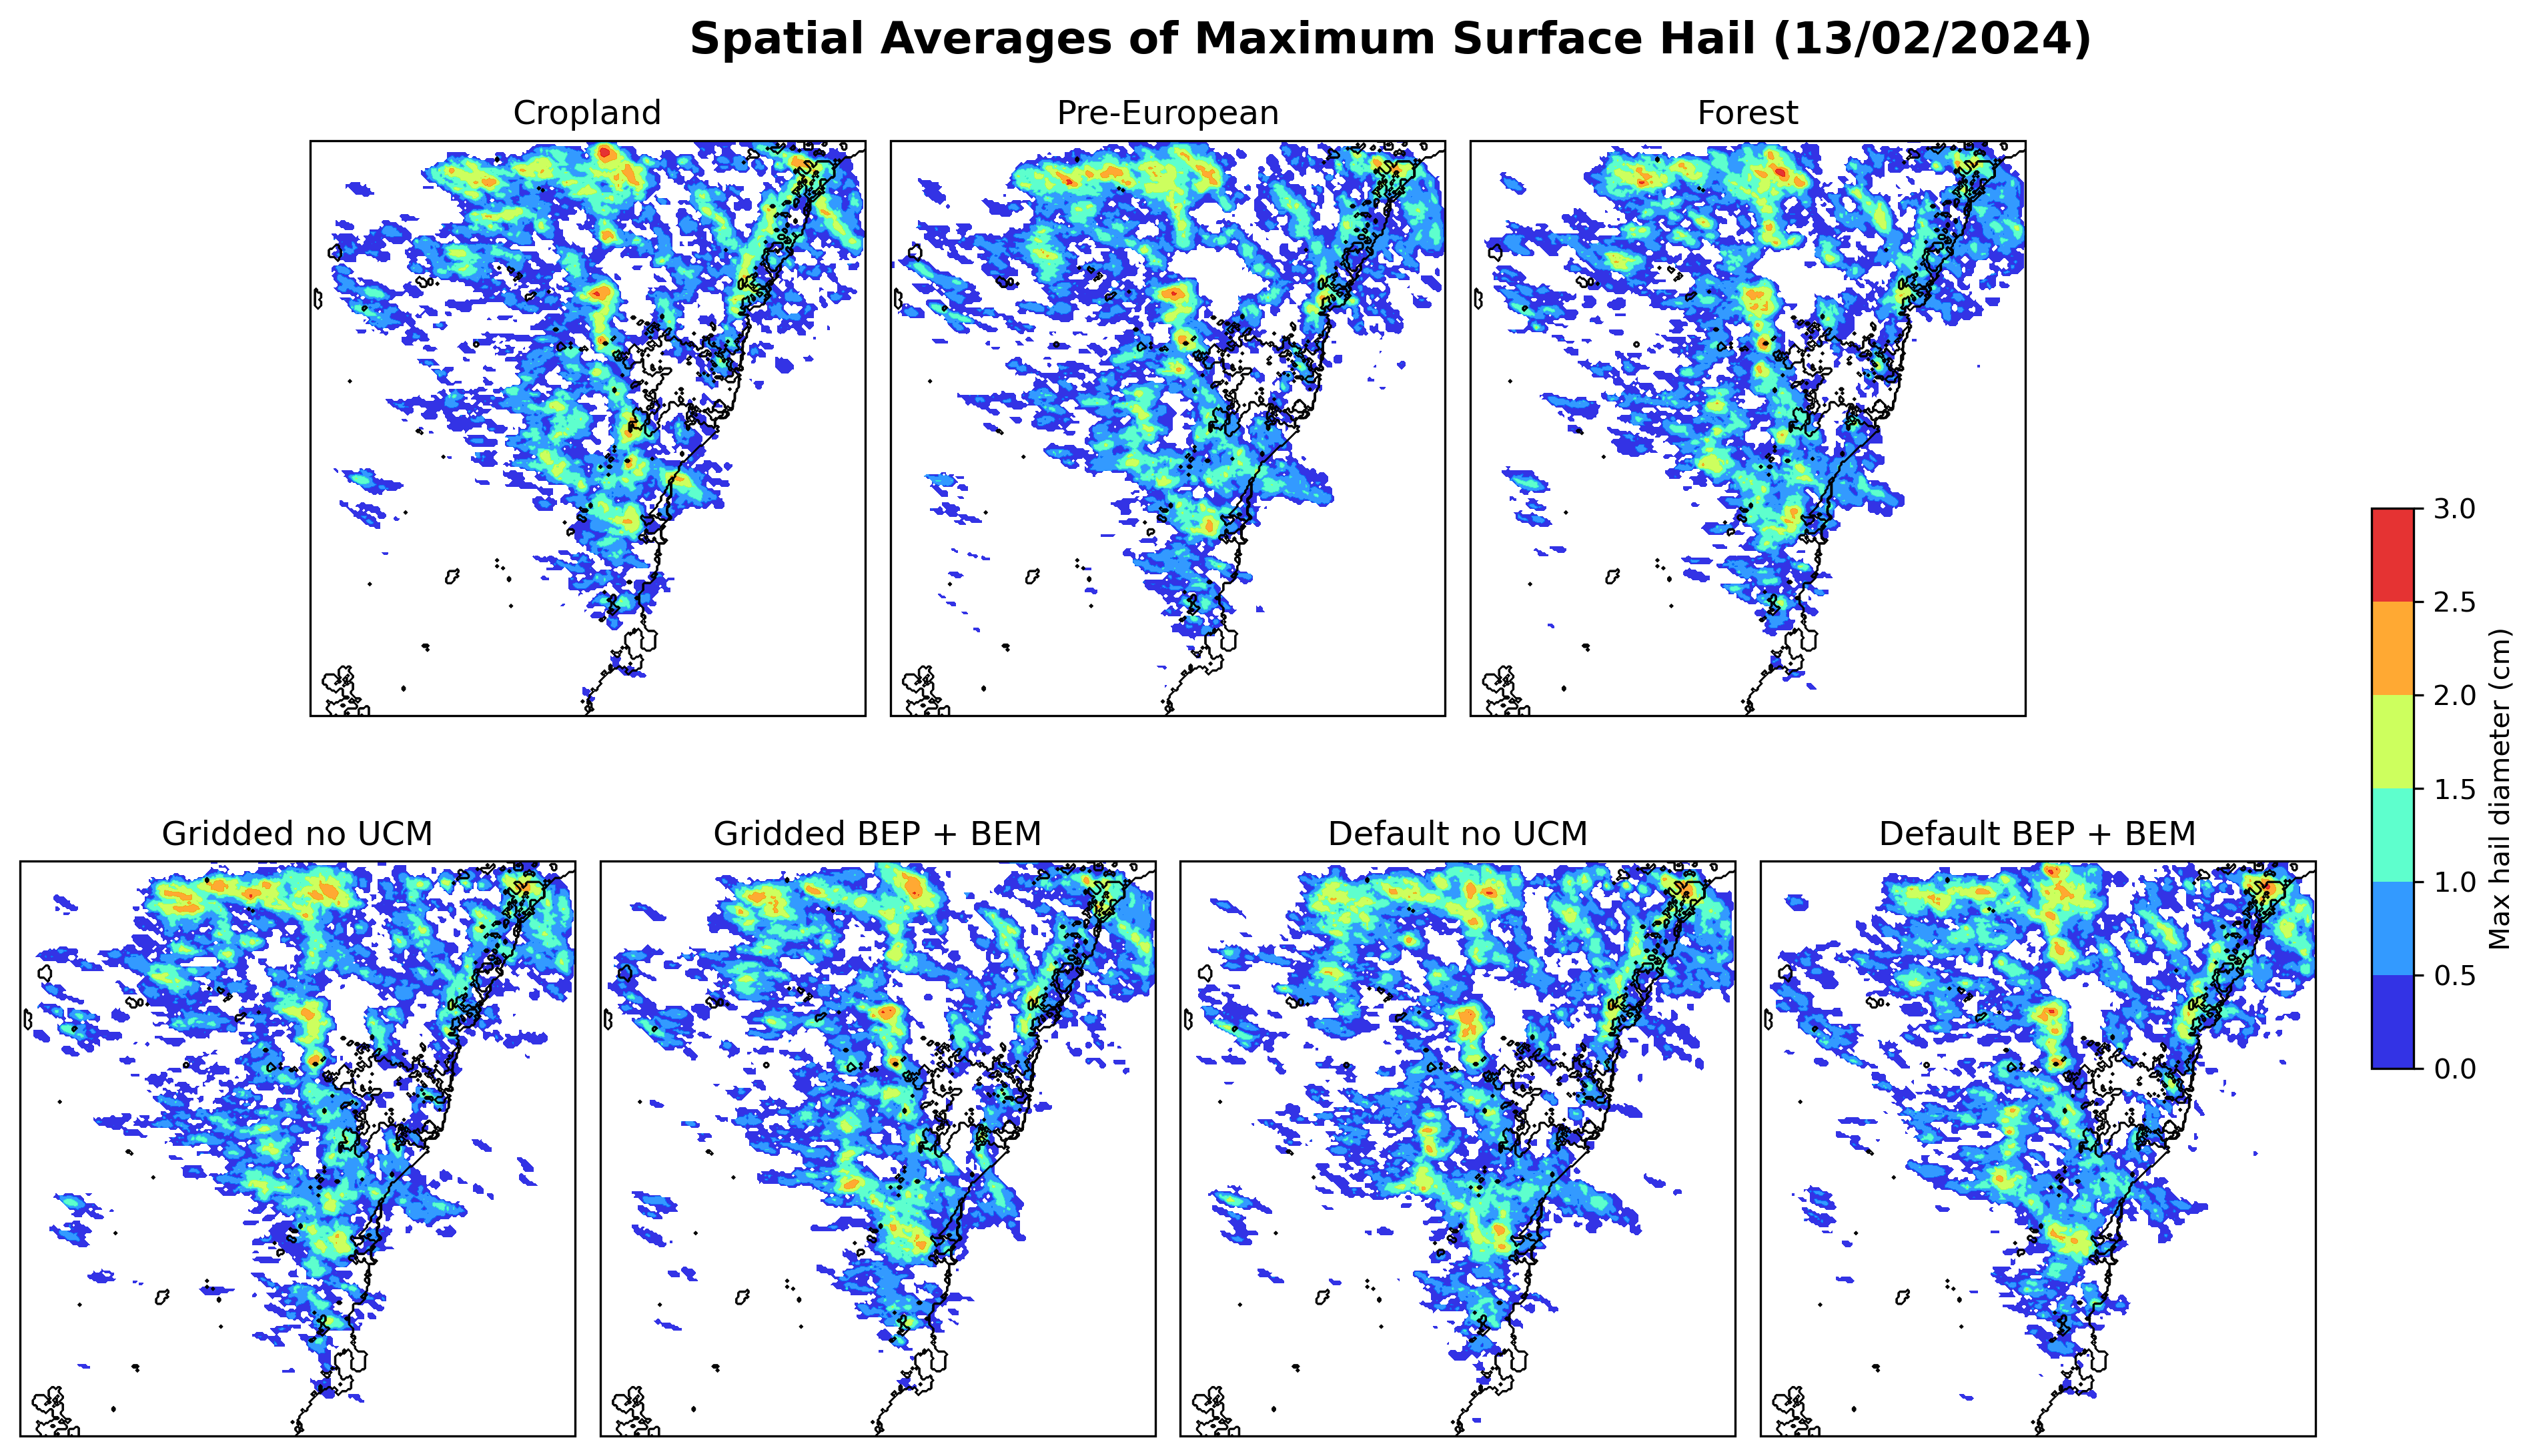

In [ ]:
# Select surface hail for a specific storm
date = '13_2024'
avg_crop = xr.open_dataset(f'WRF_saved_variables/Avghail_crop_{date}.nc')['HAIL_MAXK1']
avg_noeuro = xr.open_dataset(f'WRF_saved_variables/Avghail_noeuro_{date}.nc')['HAIL_MAXK1']
avg_nat = xr.open_dataset(f'WRF_saved_variables/Avghail_nat_{date}.nc')['HAIL_MAXK1']
avg_gr = xr.open_dataset(f'WRF_saved_variables/Avghail_gr_{date}.nc')['HAIL_MAXK1']
avg_grurb = xr.open_dataset(f'WRF_saved_variables/Avghail_grurb_{date}.nc')['HAIL_MAXK1']
avg_def = xr.open_dataset(f'WRF_saved_variables/Avghail_def_{date}.nc')['HAIL_MAXK1']
avg_defurb = xr.open_dataset(f'WRF_saved_variables/Avghail_defurb_{date}.nc')['HAIL_MAXK1']

# Set up ensemble and names
en_avgs = [avg_crop, avg_noeuro, avg_nat, avg_gr, avg_grurb, avg_def, avg_defurb]
names = ['Cropland', 'Pre-European','Forest','Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM' ]

plot_date = date_dict[date]

# Find maximum hail size for contour levels
max_list = []
for dataset in en_avgs:
    max_list.append(dataset.max())
max_hail_size = (np.ceil(max(max_list)*2)/2).values
levels = np.linspace(0, max_hail_size, int(max_hail_size*2+1))

# Extract metadata for plotting
hal = wrf.getvar(data_24_gr, 'HAIL_MAXK1', timeidx=1, method='cat') # for metadata
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Make figure
fig = plt.figure(figsize=(14,8), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)
ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 0:2], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 2:4], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 4:6], projection=cart_proj)
ax7 = fig.add_subplot(gs[1, 6:], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

# Make black colourmap for outlines
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Plot average hail
for ind in range(len(en_avgs)):
        hail = en_avgs[ind]
        hailmask = np.ma.masked_where(hail <= 0, hail)
        nat1 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(hailmask), levels = levels, #vmax=5.0,extend='max',
                 transform=crs.PlateCarree(), cmap=plt.colormaps['jet'], alpha = 0.8)
        axs[ind].set_title(names[ind])
        axs[ind].set_xlim(wrf.cartopy_xlim(hal))
        axs[ind].set_ylim(wrf.cartopy_ylim(hal))
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)

fig.subplots_adjust(right=0.83) # position of the right edge of the subplots
cbar_ax = fig.add_axes([0.85, 0.325, 0.015, 0.35]) #left, bottom, width, height
cbar = fig.colorbar(nat1, cax=cbar_ax) #extend = 'max'
cbar.set_label("Max hail diameter (cm)")
fig.suptitle(f'Spatial Averages of Maximum Surface Hail ({plot_date})', fontsize = 16, fontweight='bold')

### Plot standard deviations in hail

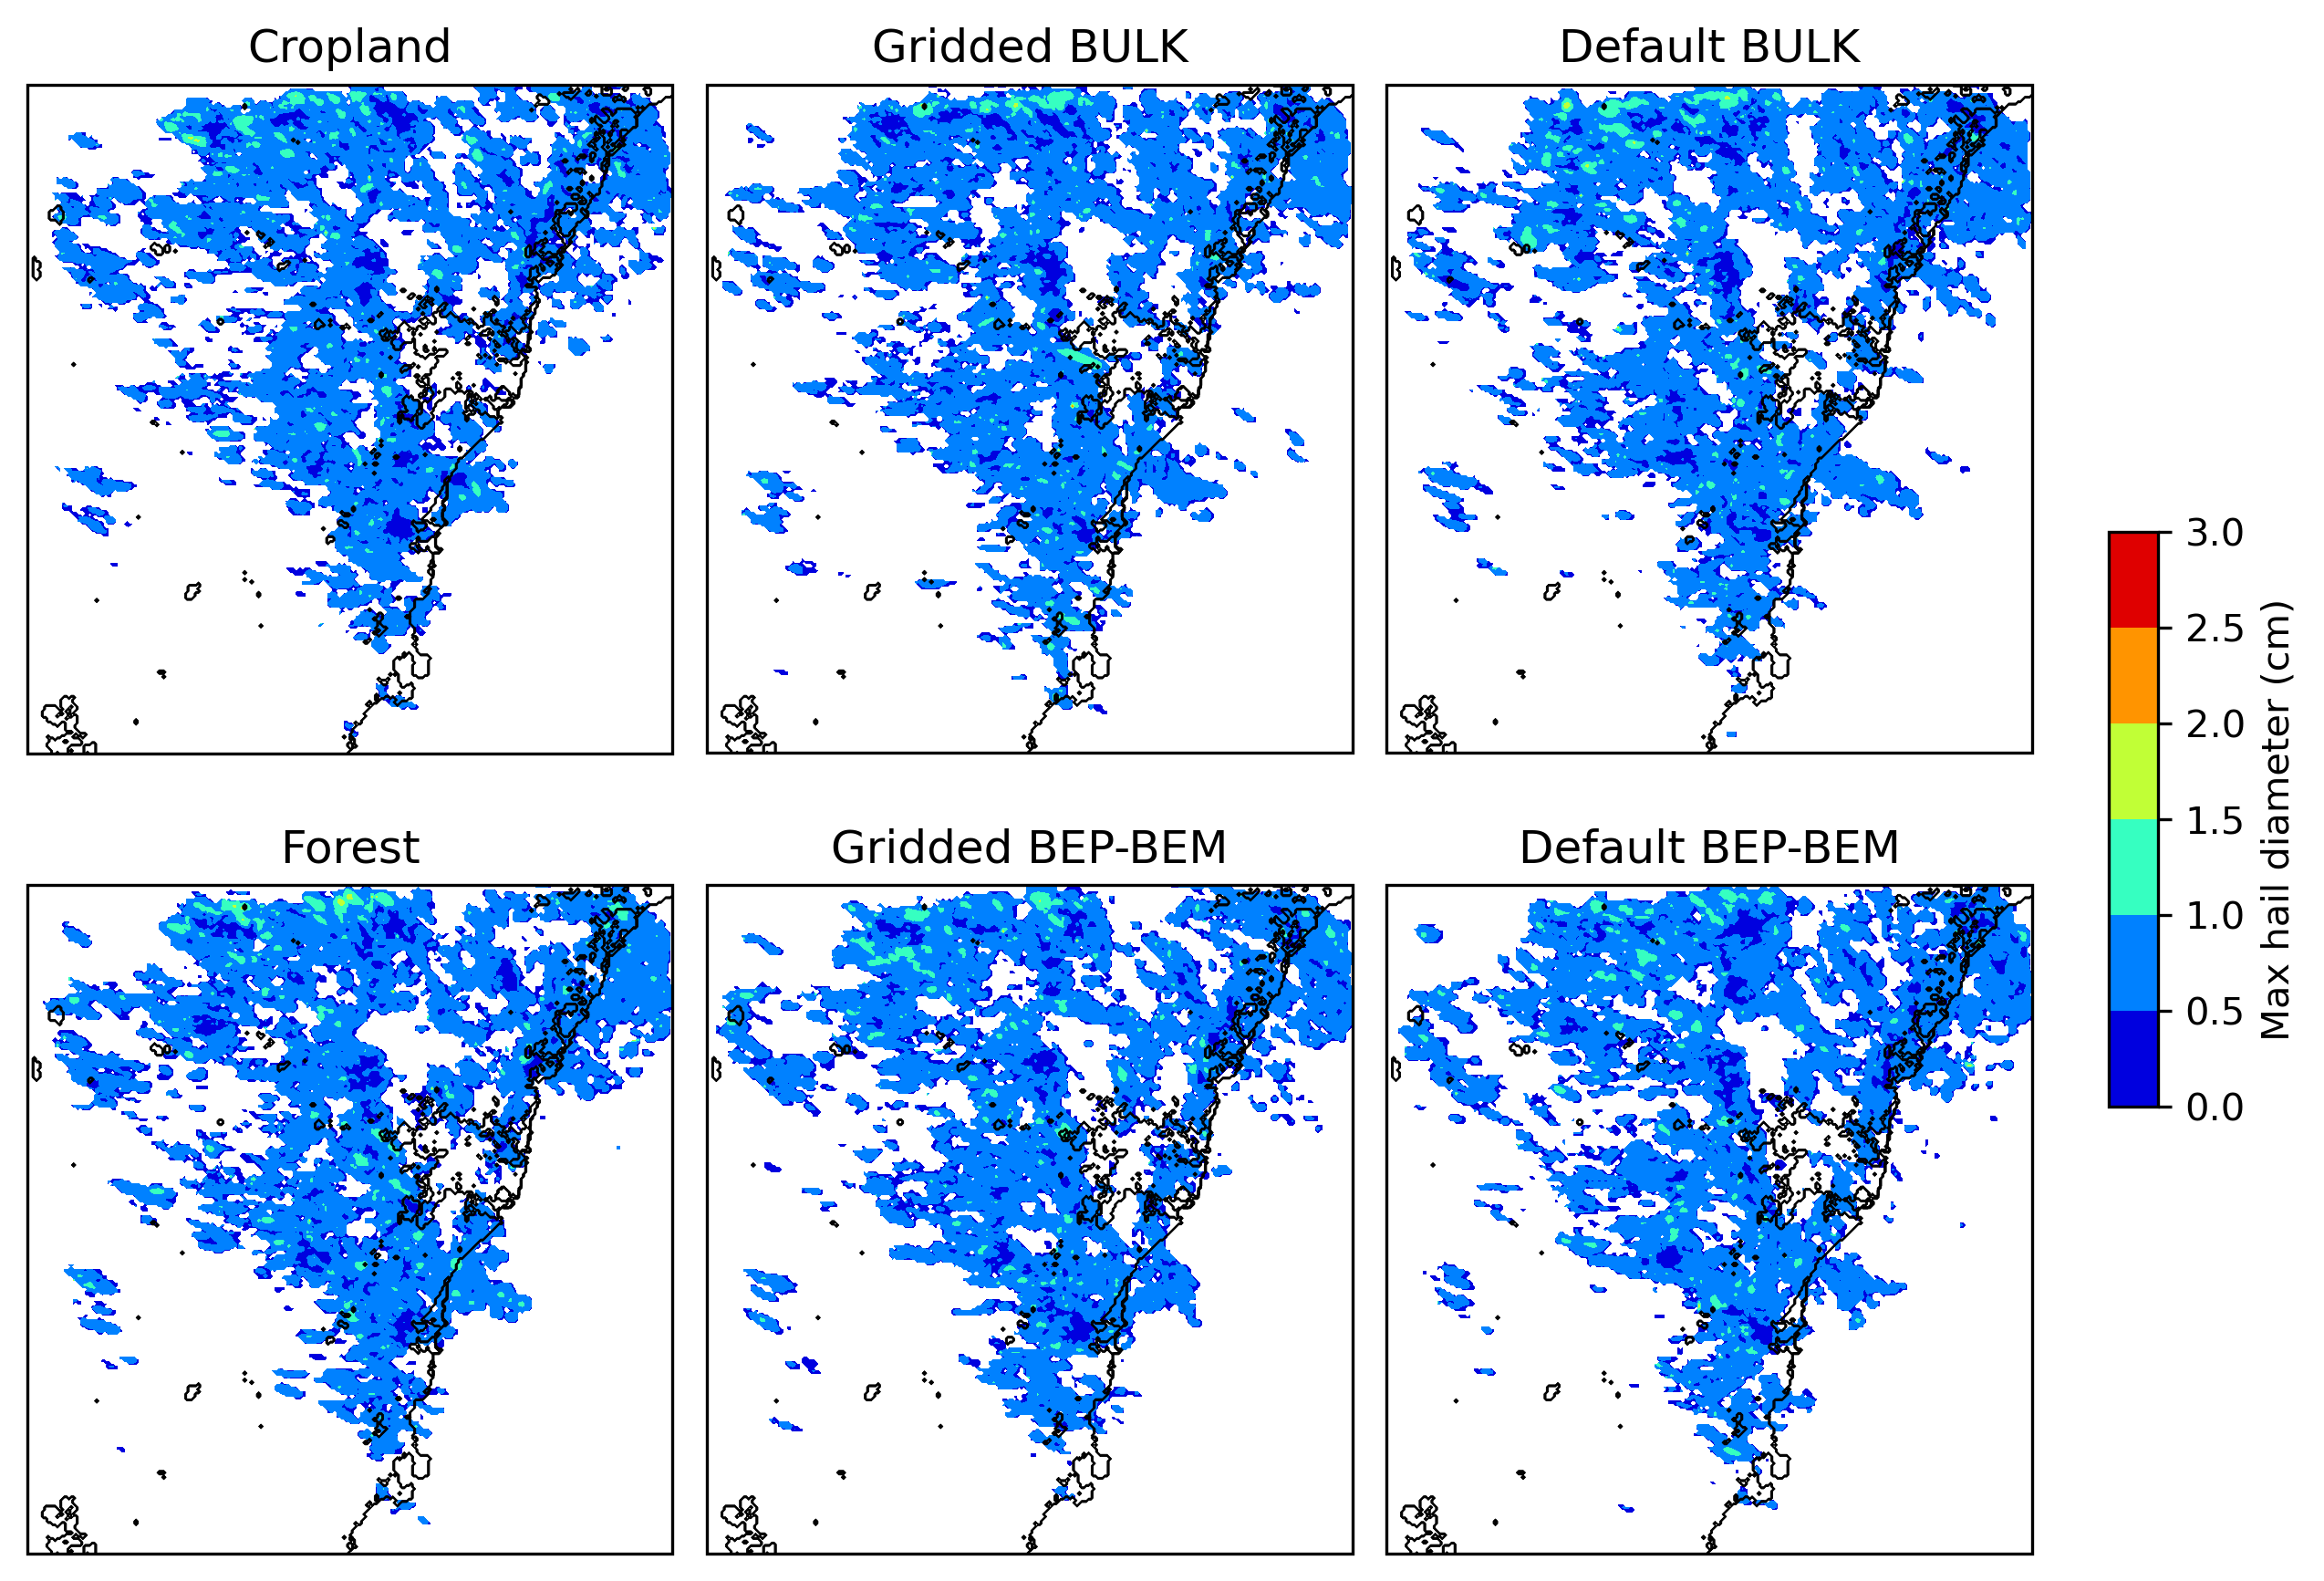

In [ ]:
# Select hail standard deviations for a specific storm
date = '13_2024'
std_crop = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_crop_{date}.txt', dtype=float)
std_nat = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_nat_{date}.txt', dtype=float)
std_gr = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_gr_{date}.txt', dtype=float)
std_grurb = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_grurb_{date}.txt', dtype=float)
std_def = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_def_{date}.txt', dtype=float)
std_defurb = np.loadtxt(f'/home/561/em3807/honours-project/WRF_saved_variables/Stdhail_defurb_{date}.txt', dtype=float)

# Set up ensemble and names
en_std = [std_crop, std_gr, std_def, std_nat, std_grurb, std_defurb]
names = ['Cropland', 'Gridded No-UCM', 'Default No-UCM', 'Forest', 'Gridded BEP-BEM','Default BEP-BEM' ]

plot_date = date_dict[date]

# Define maximum hail size from average hail plot for contour levels
max_hail_size = 3
levels = np.linspace(0, max_hail_size, int(max_hail_size*2+1))

# Extract metadata for plotting
hal = wrf.getvar(data_24_gr, 'HAIL_MAXK1', timeidx=1, method='cat') # for metadata
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Make figure
fig = plt.figure(figsize=(12,6), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)
ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 1:3], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 3:5], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 5:7], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

# Make black colourmap for outline
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Plot standard deviations
for ind in range(len(en_std)):
        hail = en_std[ind]
        hailmask = np.ma.masked_where(hail <= 0, hail)
        nat1 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(hailmask), levels = levels, #vmax=5.0,extend='max',
                 transform=crs.PlateCarree(), cmap=plt.colormaps['jet'])
        axs[ind].set_title(names[ind])
        axs[ind].set_xlim(wrf.cartopy_xlim(hal))
        axs[ind].set_ylim(wrf.cartopy_ylim(hal))
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)

fig.subplots_adjust(right=0.83) # position of the right edge of the subplots
cbar_ax = fig.add_axes([0.75, 0.325, 0.015, 0.35]) #left, bottom, width, height
cbar = fig.colorbar(nat1, cax=cbar_ax) #extend = 'max'
cbar.set_label("Max hail diameter (cm)")

# fig.suptitle(f'Standard Deviation in Maximum Surface Hail ({plot_date})', fontsize = 16, fontweight='bold')

### Ensemble-averaged 2 m temperature

In [ ]:
# Initialising time and finding indexes
storm = 2024

date_dict = {2024:'12/02/2024'}

en1 = ensemble_dict[storm][0]
en2 = ensemble_dict[storm][1]
en3 = ensemble_dict[storm][2]
en4 = ensemble_dict[storm][3]
en5 = ensemble_dict[storm][4]

# Selecting 12pm - 1pm for temperature data
start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '12:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])) #local date
end_hour = '13:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

# Find indices for dataset
inds1 = get_indexes(en1,[start_date,start_hour],[end_date,end_hour])
inds2 = get_indexes(en2,[start_date,start_hour],[end_date,end_hour])
inds3 = get_indexes(en3,[start_date,start_hour],[end_date,end_hour])
inds4 = get_indexes(en4,[start_date,start_hour],[end_date,end_hour])
inds5 = get_indexes(en5,[start_date,start_hour],[end_date,end_hour])

Starting at 2024-02-12 and ending at 2024-02-12


In [ ]:
# Extracting 2 m temperature
temp1 = []
temp2 = []
temp3 = []
temp4 = []
temp5 = []

for caseind in range(len(inds1)):
    t1 = wrf.getvar(en1[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds1[caseind][0]:inds1[caseind][1]+1,:,:].mean('Time') - 273.15
    temp1.append(t1)
    t2 = wrf.getvar(en2[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds2[caseind][0]:inds2[caseind][1]+1,:,:].mean('Time') - 273.15
    temp2.append(t2)
    t3 = wrf.getvar(en3[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds3[caseind][0]:inds3[caseind][1]+1,:,:].mean('Time') - 273.15
    temp3.append(t3)
    t4 = wrf.getvar(en4[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds4[caseind][0]:inds4[caseind][1]+1,:,:].mean('Time') - 273.15
    temp4.append(t4)
    t5 = wrf.getvar(en5[caseind], 'T2', timeidx=ALL_TIMES, method='cat')[inds5[caseind][0]:inds5[caseind][1]+1,:,:].mean('Time') - 273.15
    temp5.append(t5)

# Averaging temperature values across ensembles
average_crop = (temp1[0]+temp2[0]+temp3[0]+temp4[0]+temp5[0])/5
average_nat = (temp1[1]+temp2[1]+temp3[1]+temp4[1]+temp5[1])/5
average_gr = (temp1[2]+temp2[2]+temp3[2]+temp4[2]+temp5[2])/5
average_grurb = (temp1[3]+temp2[3]+temp3[3]+temp4[3]+temp5[3])/5
average_def = (temp1[4]+temp2[4]+temp3[4]+temp4[4]+temp5[4])/5
average_defurb = (temp1[5]+temp2[5]+temp3[5]+temp4[5]+temp5[5])/5

temp = [average_crop, average_gr, average_def, average_nat, average_grurb, average_defurb]

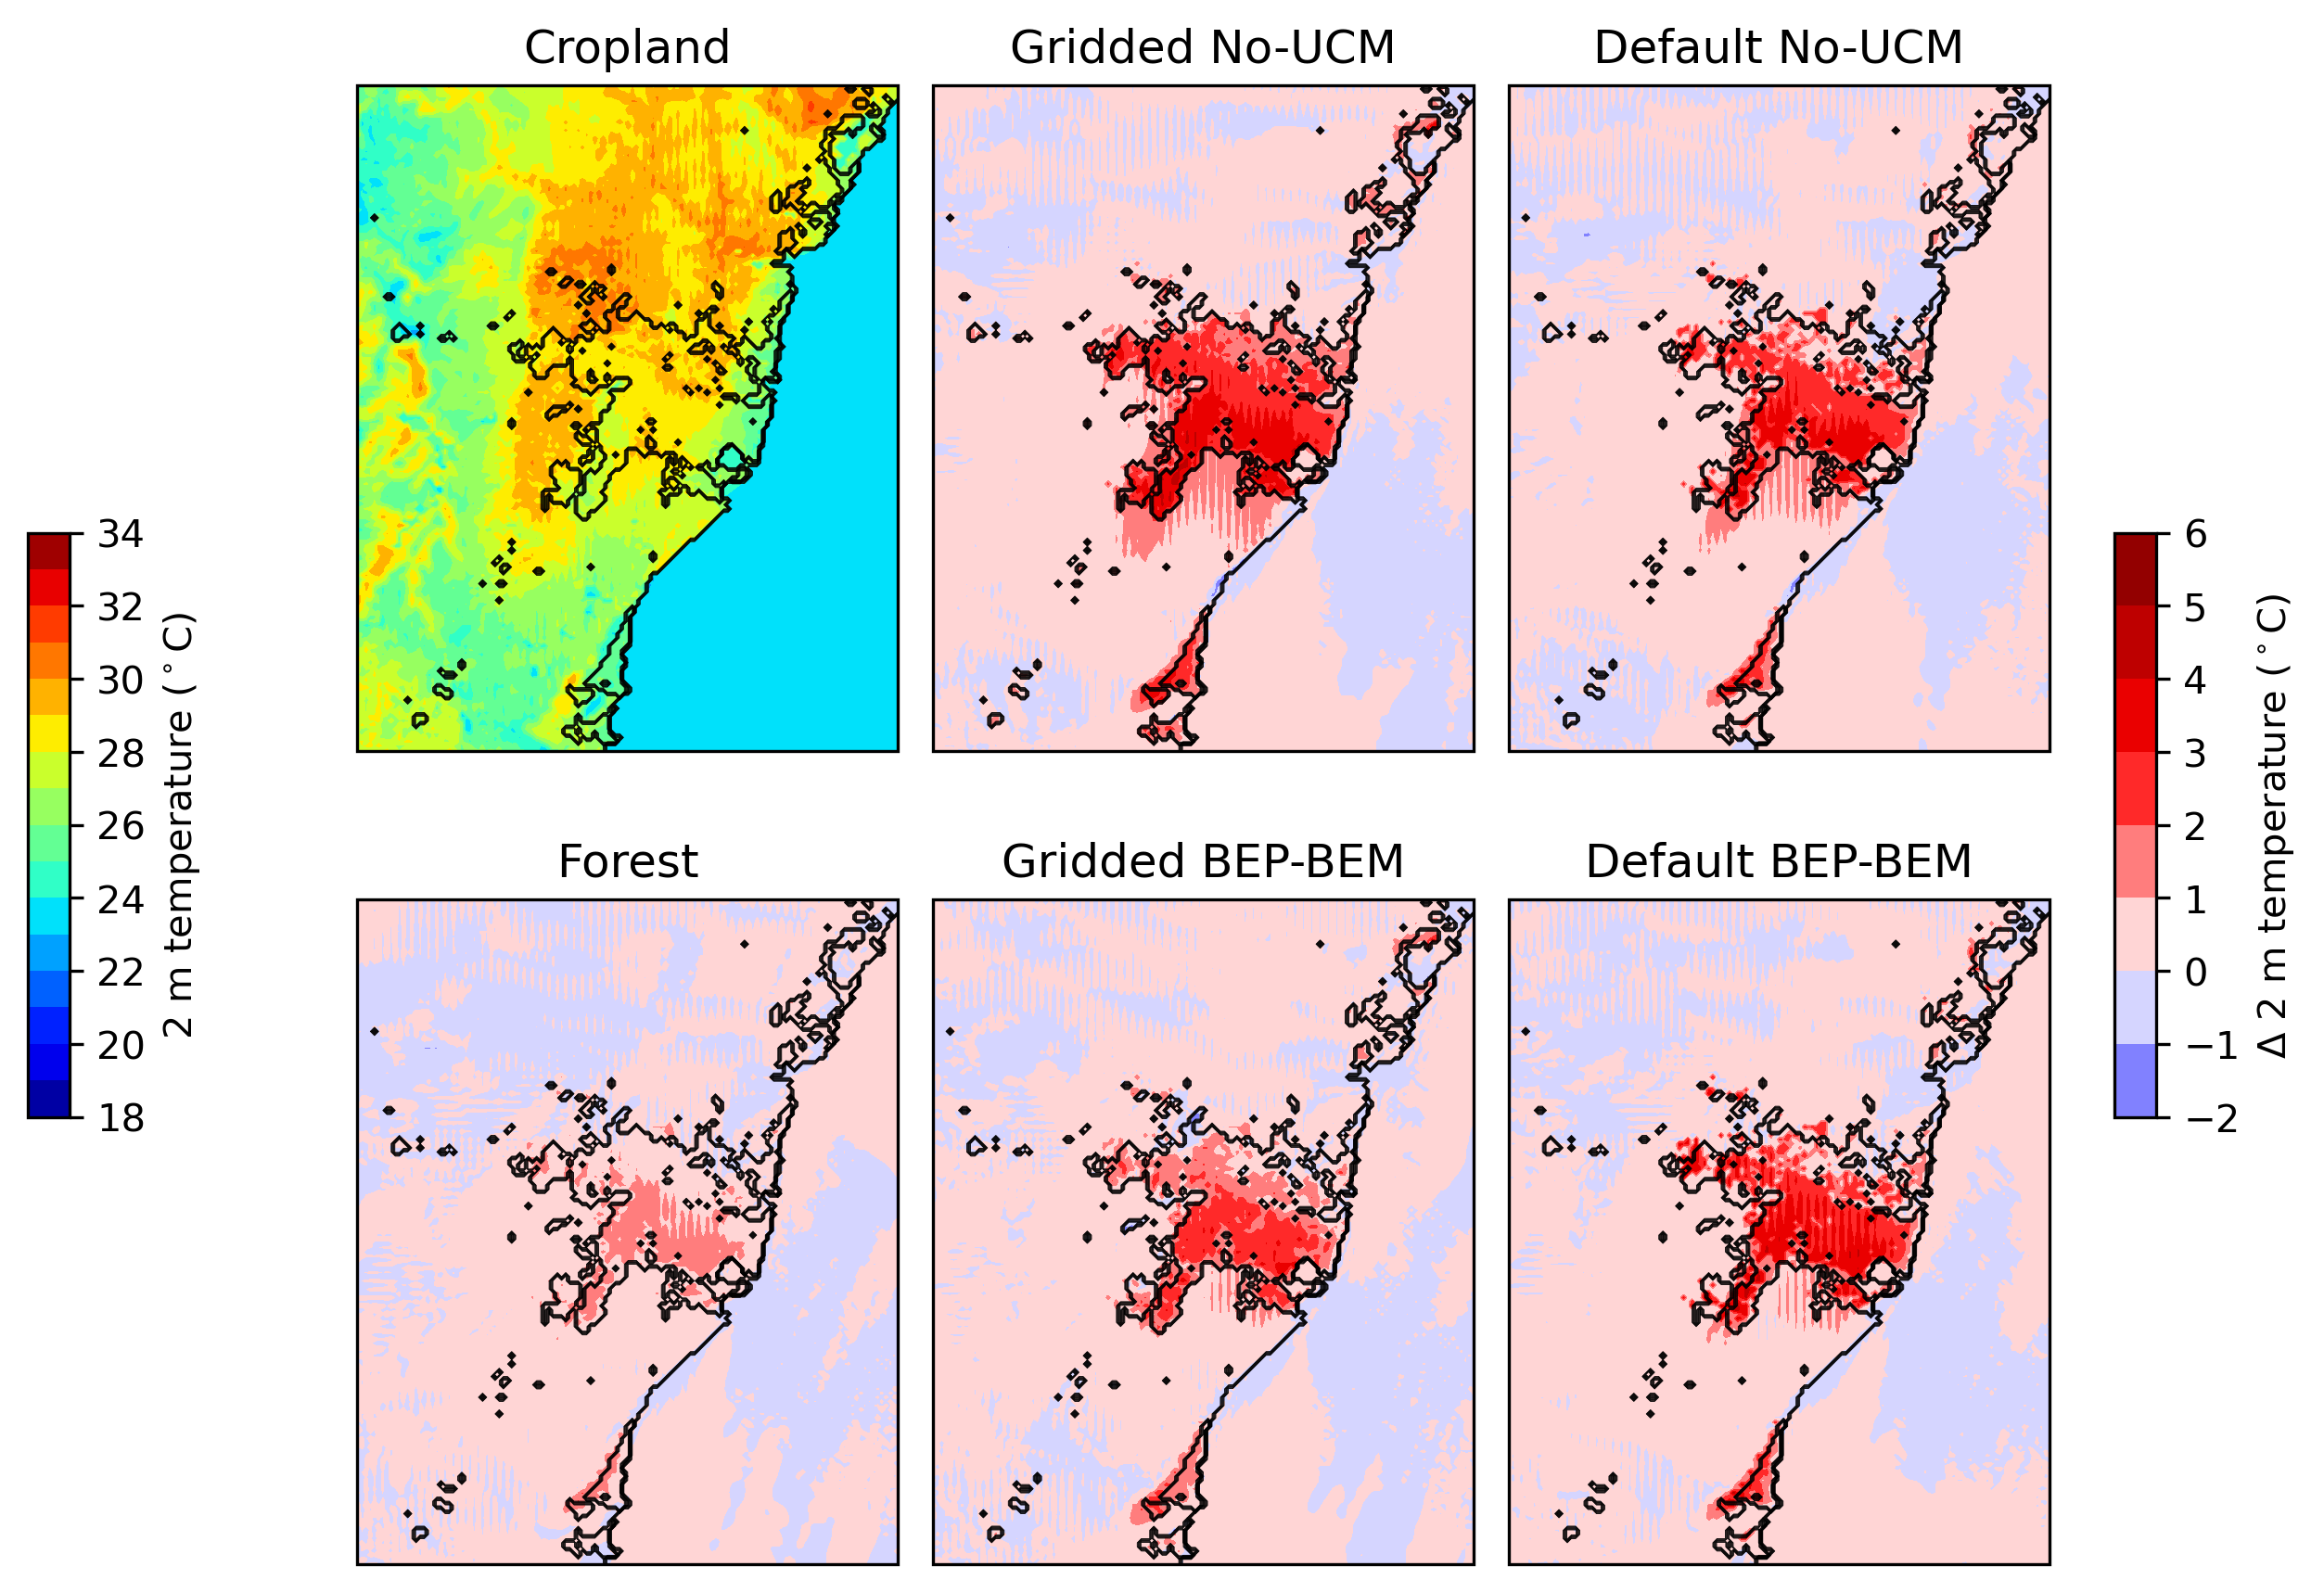

In [ ]:
names = ['Cropland', 'Gridded No-UCM', 'Default No-UCM', 'Forest', 'Gridded BEP-BEM','Default BEP-BEM' ]

# Extracting metadata for plotting
hal = wrf.getvar(data_24_gr, 'HAIL_MAXK1', timeidx=1, method='cat') # for coordinate data
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Make figure
fig = plt.figure(figsize=(10,6), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)
ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 1:3], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 3:5], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 5:7], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

# Define temperature and temperature change levels for contour plots
tlevels = np.linspace(18,34,17)
difflevels = np.linspace(-2,6,9)

# Make black colourmap for outline
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Make colourmap for differences
norm_plot = TwoSlopeNorm(vmin=-6, vcenter=0, vmax=6)
cmap_seismic = plt.get_cmap('seismic').copy()
cmap_seismic.set_under(color='white')

# Plot temperatures and temperature differences
for ind in range(len(temp)):
        if ind == 0:
                nat1 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(temp[ind]),vmin = 18, vmax = 34, #levels = levels, #vmax=5.0,extend='max',
                                           transform=crs.PlateCarree(), cmap=plt.colormaps['jet'], levels = tlevels)
        else:
                nat2 = axs[ind].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(temp[ind])-wrf.to_np(temp[0]),norm=norm_plot, #levels = levels, #vmax=5.0,extend='max',
                                           transform=crs.PlateCarree(), cmap=cmap_seismic, levels = difflevels)
        axs[ind].set_title(names[ind])
        axs[ind].set_xlim(wrf.cartopy_xlim(hal))
        axs[ind].set_ylim(wrf.cartopy_ylim(hal))
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[ind].set_xlim(-10000, 120000)
        axs[ind].set_ylim(-80000, 80000)
fig.subplots_adjust(right=0.83) # position of the right edge of the subplots

# Make 2 colourbars; one for differences and one for absolute magnitude of temperature
cbar_ax = fig.add_axes([0.75, 0.325, 0.015, 0.35]) #left, bottom, width, height
cbar_ax2 = fig.add_axes([0, 0.325, 0.015, 0.35]) #left, bottom, width, height
ticks = [-2,-1,0,1,2,3,4,5,6]
tick2 = [18, 20, 22, 24, 26, 28, 30, 32, 34]
cbar = fig.colorbar(nat2, cax=cbar_ax)
cbar.set_ticks(ticks)
cbar_ax.set_ylim(-2, 6)
cbar2 = fig.colorbar(nat1, cax=cbar_ax2, ticks = tick2)
cbar2.set_label("2 m temperature ($^\circ$C)")
cbar.set_label("$\Delta$ 2 m temperature ($^\circ$C)")

### Plotting 10 m wind field

In [11]:
# Initialising time
storm = 2017

date_dict = {2024:'13/02/2024', 2020:'17/12/2020', 2017:'18/02/2017', 2018:'20/12/2018'}

en1 = ensemble_dict[storm][0]
en2 = ensemble_dict[storm][1]
en3 = ensemble_dict[storm][2]
en4 = ensemble_dict[storm][3]
en5 = ensemble_dict[storm][4]

# Selecting 12pm - 1pm
start_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+date_dict[storm][0:2] #local date
start_hour = '12:00:00'   #local time

end_date = date_dict[storm][6:]+'-'+date_dict[storm][3:5]+'-'+str(int(date_dict[storm][0:2])) #local date
end_hour = '13:00:00'   #local time

print(f'Starting at {start_date} and ending at {end_date}')

inds1 = get_indexes(en1,[start_date,start_hour],[end_date,end_hour])
inds2 = get_indexes(en2,[start_date,start_hour],[end_date,end_hour])
inds3 = get_indexes(en3,[start_date,start_hour],[end_date,end_hour])
inds4 = get_indexes(en4,[start_date,start_hour],[end_date,end_hour])
inds5 = get_indexes(en5,[start_date,start_hour],[end_date,end_hour])

Starting at 2017-02-18 and ending at 2017-02-18


In [ ]:
# Make lists to store wind data
wind1 = []
u1 = []
v1 = []
wind2 = []
u2 = []
v2 = []
wind3 = []
u3 = []
v3 = []
wind4 = []
u4 = []
v4 = []
wind5 = []
u5 = []
v5 = []

# Extract wind data and average over the selected hour
for caseind in range(len(inds1)):
    wind1.append(wrf.g_uvmet.get_uvmet10_wspd_wdir(en1[caseind], timeidx=ALL_TIMES, method='cat')[0,inds1[caseind][0]:inds1[caseind][1]+1,:,:].mean('Time'))
    u1.append(wrf.getvar(en1[caseind], 'U10', timeidx=ALL_TIMES, method='cat')[inds1[caseind][0]:inds1[caseind][1]+1,:,:].mean('Time'))
    v1.append(wrf.getvar(en1[caseind], 'V10', timeidx=ALL_TIMES, method='cat')[inds1[caseind][0]:inds1[caseind][1]+1,:,:].mean('Time'))
    wind2.append(wrf.g_uvmet.get_uvmet10_wspd_wdir(en2[caseind], timeidx=ALL_TIMES, method='cat')[0,inds2[caseind][0]:inds2[caseind][1]+1,:,:].mean('Time'))
    u2.append(wrf.getvar(en2[caseind], 'U10', timeidx=ALL_TIMES, method='cat')[inds2[caseind][0]:inds2[caseind][1]+1,:,:].mean('Time'))
    v2.append(wrf.getvar(en2[caseind], 'V10', timeidx=ALL_TIMES, method='cat')[inds2[caseind][0]:inds2[caseind][1]+1,:,:].mean('Time'))
    wind3.append(wrf.g_uvmet.get_uvmet10_wspd_wdir(en3[caseind], timeidx=ALL_TIMES, method='cat')[0,inds3[caseind][0]:inds3[caseind][1]+1,:,:].mean('Time'))
    u3.append(wrf.getvar(en3[caseind], 'U10', timeidx=ALL_TIMES, method='cat')[inds3[caseind][0]:inds3[caseind][1]+1,:,:].mean('Time'))
    v3.append(wrf.getvar(en3[caseind], 'V10', timeidx=ALL_TIMES, method='cat')[inds3[caseind][0]:inds3[caseind][1]+1,:,:].mean('Time'))
    wind4.append(wrf.g_uvmet.get_uvmet10_wspd_wdir(en4[caseind], timeidx=ALL_TIMES, method='cat')[0,inds4[caseind][0]:inds4[caseind][1]+1,:,:].mean('Time'))
    u4.append(wrf.getvar(en4[caseind], 'U10', timeidx=ALL_TIMES, method='cat')[inds4[caseind][0]:inds4[caseind][1]+1,:,:].mean('Time'))
    v4.append(wrf.getvar(en4[caseind], 'V10', timeidx=ALL_TIMES, method='cat')[inds4[caseind][0]:inds4[caseind][1]+1,:,:].mean('Time'))
    wind5.append(wrf.g_uvmet.get_uvmet10_wspd_wdir(en5[caseind], timeidx=ALL_TIMES, method='cat')[0,inds5[caseind][0]:inds5[caseind][1]+1,:,:].mean('Time'))
    u5.append(wrf.getvar(en5[caseind], 'U10', timeidx=ALL_TIMES, method='cat')[inds5[caseind][0]:inds5[caseind][1]+1,:,:].mean('Time'))
    v5.append(wrf.getvar(en5[caseind], 'V10', timeidx=ALL_TIMES, method='cat')[inds5[caseind][0]:inds5[caseind][1]+1,:,:].mean('Time'))
wind = []
u = []
v = []

# Average wind variables over the ensemble members
for i in range(len(wind1)):
    a = (wind1[i]+wind2[i]+wind3[i]+wind4[i]+wind5[i])/5
    wind.append(a)
    b = (v1[i]+v2[i]+v3[i]+v4[i]+v5[i])/5
    v.append(b)
    c = (u1[i]+u2[i]+u3[i]+u4[i]+u5[i])/5
    u.append(c)

NameError: name 'wind' is not defined

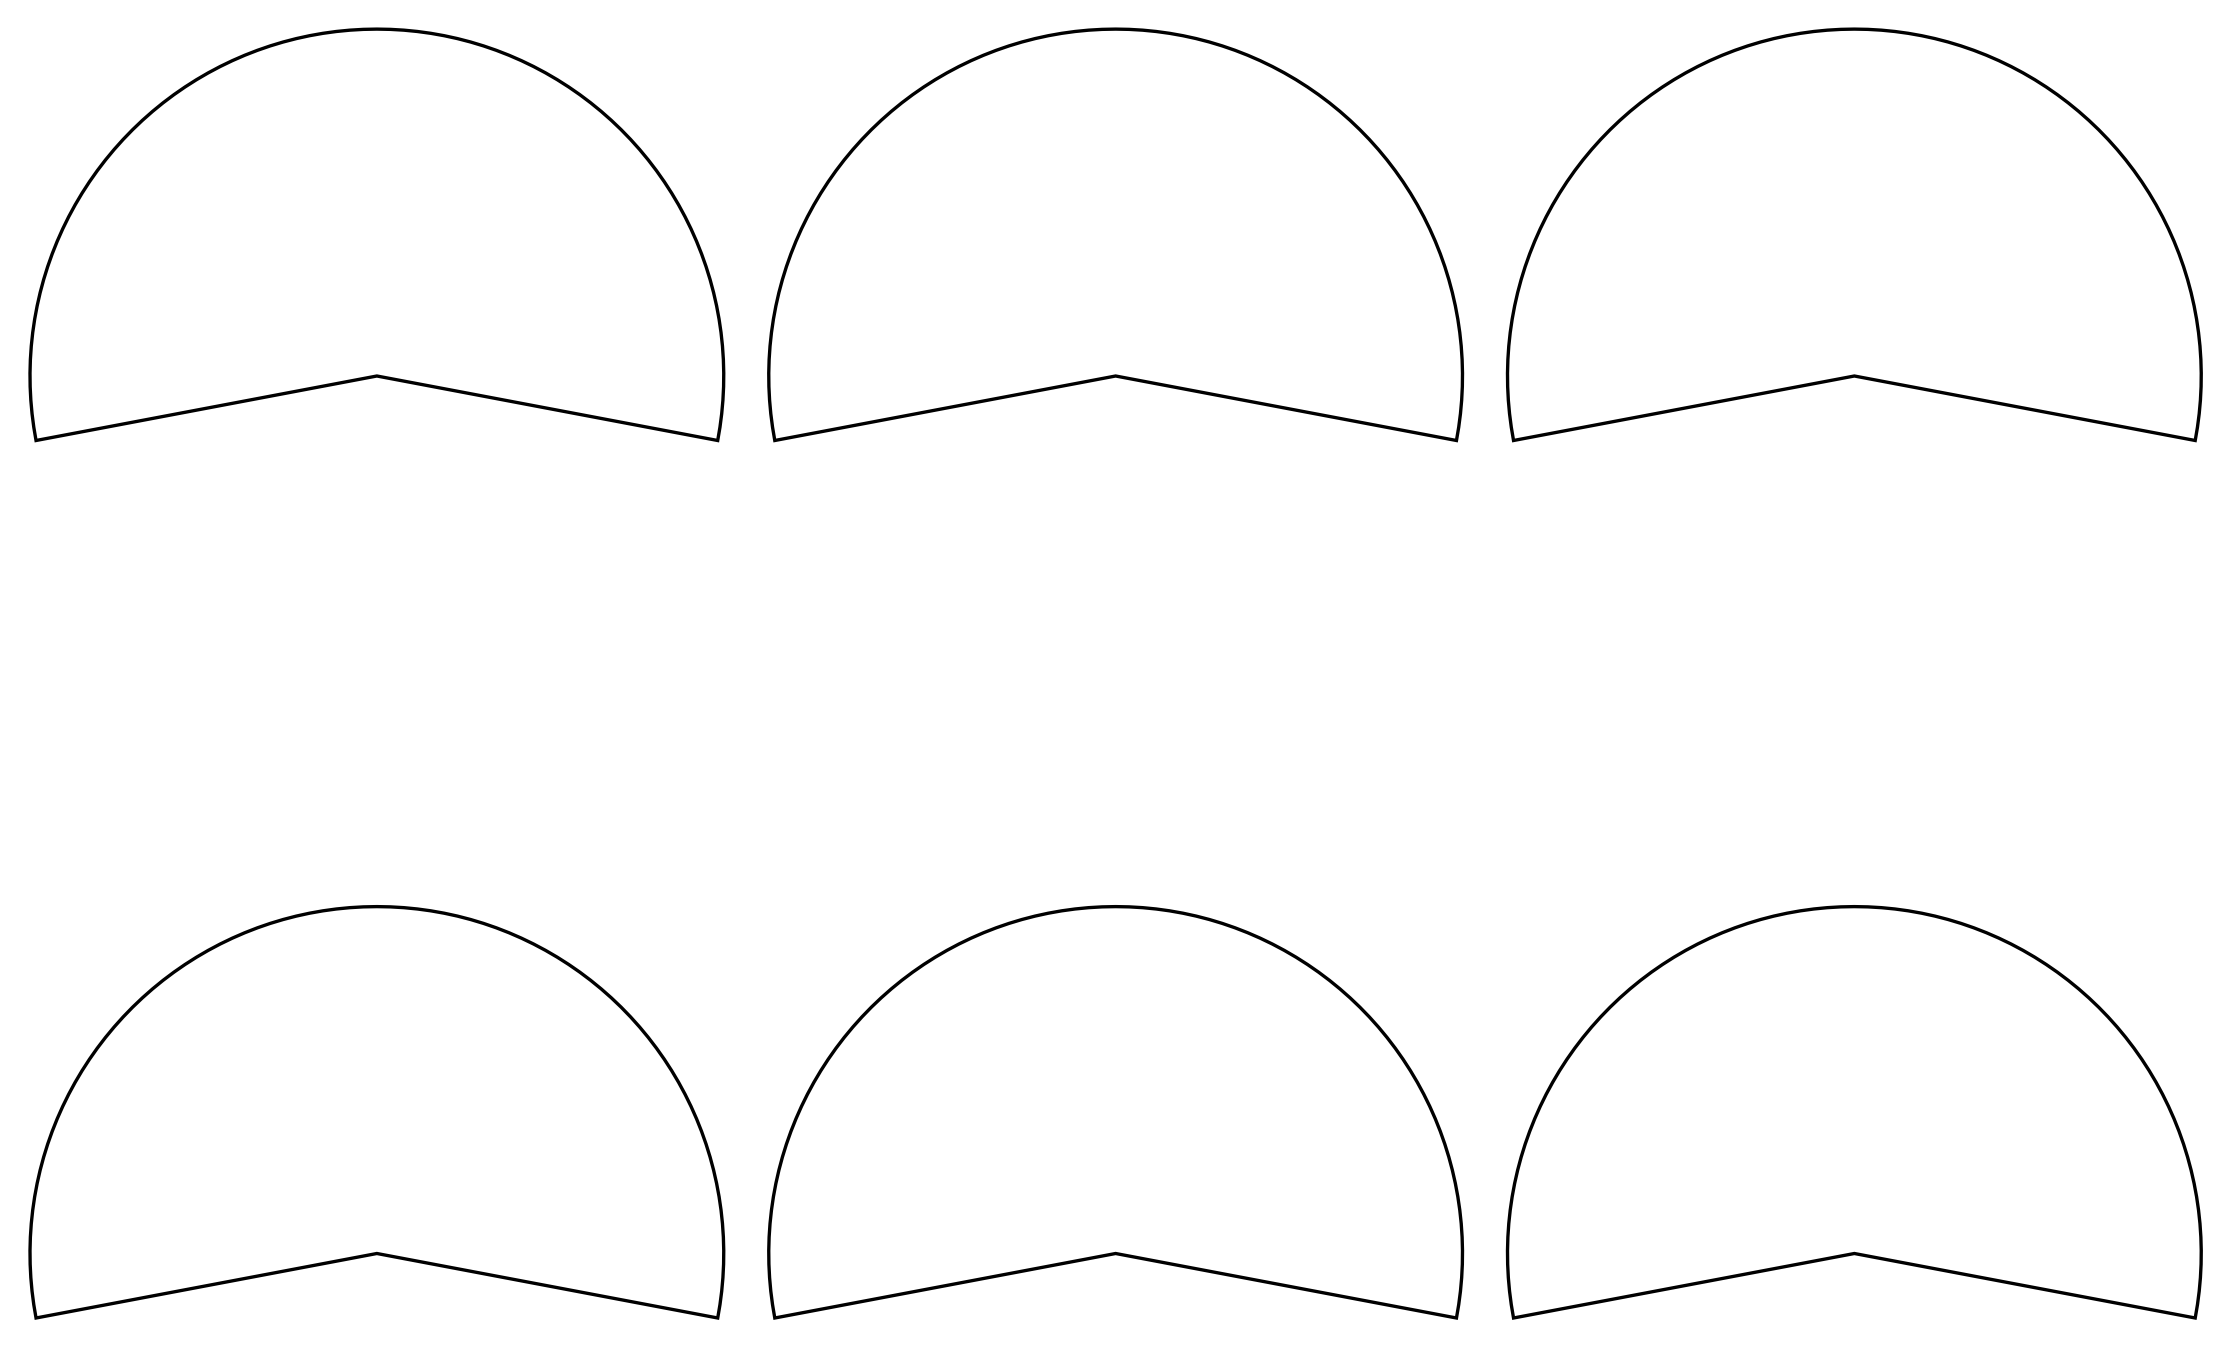

In [ ]:
names = ['Cropland', 'Forest', 'Gridded No-UCM', 'Gridded BEP-BEM', 'Default No-UCM', 'Default BEP-BEM' ]

# Extract metadata for plotting
hal = wrf.getvar(data_24_gr, 'HAIL_MAXK1', timeidx=1, method='cat') # for coordinates
lats, lons = wrf.latlon_coords(hal)
cart_proj = wrf.get_cartopy(hal)

# Make figure
fig = plt.figure(figsize=(10,6), dpi=300)
gs = gridspec.GridSpec(nrows=2, ncols=8, figure=fig)
ax1 = fig.add_subplot(gs[0, 1:3], projection=cart_proj)
ax2 = fig.add_subplot(gs[0, 3:5], projection=cart_proj)
ax3 = fig.add_subplot(gs[0, 5:7], projection=cart_proj)
ax4 = fig.add_subplot(gs[1, 1:3], projection=cart_proj)
ax5 = fig.add_subplot(gs[1, 3:5], projection=cart_proj)
ax6 = fig.add_subplot(gs[1, 5:7], projection=cart_proj)
plt.tight_layout()
axs = [ax1, ax2, ax3, ax4, ax5, ax6]

# Re-arrange plot order
plot_order = [0,2,4,1,3,5]

# Make black colourmap for outline
cmapb = (mpl.colors.ListedColormap(['black']))
cmapb.set_bad(alpha=0)
bounds = [49,60]
norm = mpl.colors.BoundaryNorm(bounds, cmapb.N)

# Define contour levels and colourmaps for absolute wind speed and wind speed differences
levels = np.linspace(0,11,12)
levels2 = np.linspace(-7,7,15)
norm_plot = TwoSlopeNorm(vmin=-7, vcenter=0, vmax=7)
cmap_seismic = plt.get_cmap('seismic').copy()
cmap_seismic.set_under(color='white')

i = 0
# Plot wind speed and wind speed differences
for ind in plot_order:
        if ind == 0:
                nat1 = axs[i].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(wind[ind]),
                                           transform=crs.PlateCarree(), cmap=plt.colormaps['jet'], levels= levels)
                axs[i].quiver(to_np(lons[::10, ::10]), to_np(lats[::10, ::10]),
                          to_np(u[ind][::10, ::10]), to_np(v[ind][::10, ::10]), transform=crs.PlateCarree())
        else:
                nat2 = axs[i].contourf(wrf.to_np(lons), wrf.to_np(lats), wrf.to_np(wind[ind])-wrf.to_np(wind[0]),
                                           transform=crs.PlateCarree(), cmap=cmap_seismic, norm = norm_plot, levels=levels2, 
                                           alpha = 0.9)
                udiff = u[ind] - u[0]
                vdiff = v[ind] - v[0]
                axs[i].quiver(to_np(lons[::10, ::10]), to_np(lats[::10, ::10]),
                          to_np(udiff[::10, ::10]), to_np(vdiff[::10, ::10]), transform=crs.PlateCarree())
        axs[i].set_title(names[ind])
        axs[i].set_xlim(wrf.cartopy_xlim(hal))
        axs[i].set_ylim(wrf.cartopy_ylim(hal))
        axs[i].contour(wrf.to_np(lons), wrf.to_np(lats), urb_outline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[i].contour(wrf.to_np(lons), wrf.to_np(lats), gr_coastline(), 
                transform=crs.PlateCarree(), cmap=cmapb, linewidths = 0.2)
        axs[i].set_xlim(-10000, 120000)
        axs[i].set_ylim(-80000, 80000)
        i = i+1
fig.subplots_adjust(right=0.83) # position of the right edge of the subplots

# Make two colourbars
cbar_ax = fig.add_axes([0.75, 0.325, 0.015, 0.41]) #left, bottom, width, height
cbar_ax2 = fig.add_axes([0.02, 0.6, 0.015, 0.3]) #left, bottom, width, height
ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
tick2 = [0,1,2,3,4,5,6,7,8,9,10,11]
cbar = fig.colorbar(nat2, cax=cbar_ax)
cbar.set_ticks(ticks)
cbar_ax.set_ylim(-7, 3)
cbar2 = fig.colorbar(nat1, cax=cbar_ax2, ticks = tick2) 
cbar2.set_label("Wind speed (m/s)")
cbar.set_label("$\Delta$ Wind speed (m/s)")

### Skew-T Plots

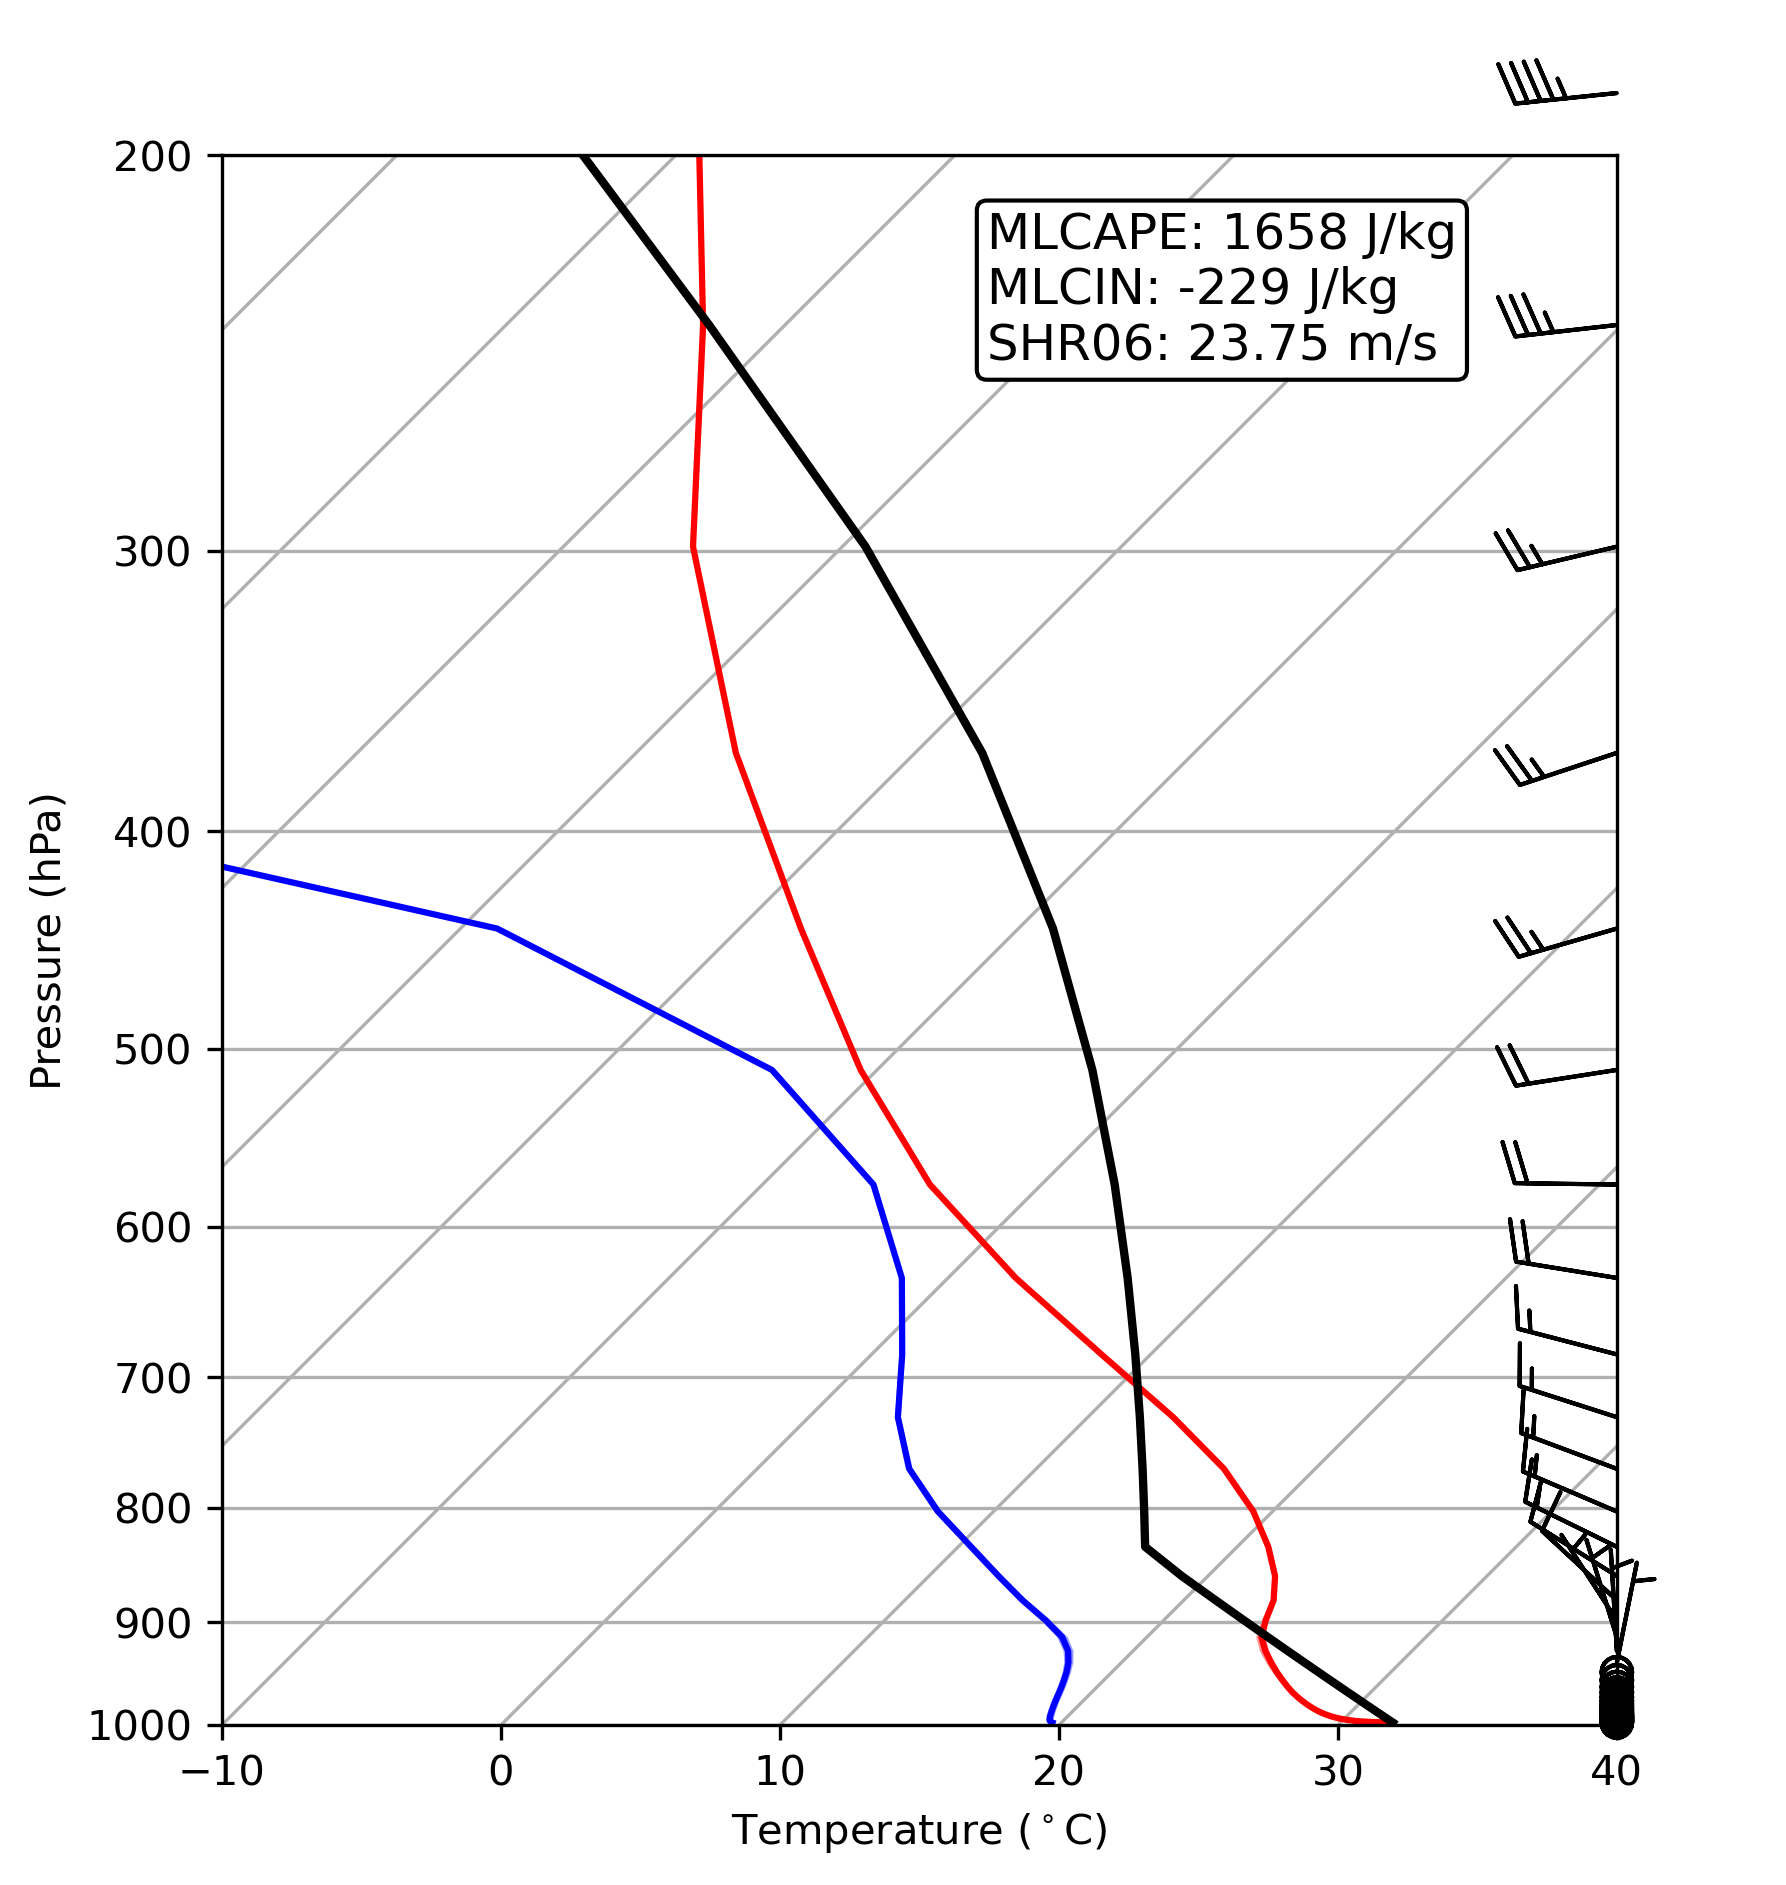

In [ ]:
# Select simulation by setup name
setup_name = 'NoUCM_WRFDef_2018'

# Select storm date
# date = '18/02/2017'
date = '20/12/2018'
# date = '17/12/2020'
# date = '13/02/2024'

times = ['9am', '12pm', '3pm', '6pm']

# Load in Skew-T files
files = [f'/g/data/li18/em3807_2/WRF_runs/Skew-T/{setup_name}_{date[0:2]}_urban_skewt.nc',
f'/g/data/li18/em3807_2/WRF_runs/Skew-T/{setup_name}_2_{date[0:2]}_urban_skewt.nc',
f'/g/data/li18/em3807_2/WRF_runs/Skew-T/{setup_name}_3_{date[0:2]}_urban_skewt.nc',
f'/g/data/li18/em3807_2/WRF_runs/Skew-T/{setup_name}_4_{date[0:2]}_urban_skewt.nc',
f'/g/data/li18/em3807_2/WRF_runs/Skew-T/{setup_name}_5_{date[0:2]}_urban_skewt.nc'
]

T_list = []
p_list = []
Td_list = []
u_list = []
v_list = []

# Extract necessary variabiles from Skew-T files
for file in files:
    ds = xr.open_dataset(file, engine = 'netcdf4')
    if file == '/g/data/li18/em3807_2/WRF_runs/Skew-T/BEPBEM_WRFDef_2018_20_urban_skewt.nc':
        T_list.append(ds['T'][1:])
        p_list.append(ds['pressure'][1:])
        Td_list.append(ds['Td'][1:])
        u_list.append(ds['u'][1:])
        v_list.append(ds['v'][1:])
    else:
        T_list.append(ds['T'])
        p_list.append(ds['pressure'])
        Td_list.append(ds['Td'])
        u_list.append(ds['u'])
        v_list.append(ds['v'])

# Plot a Skew-T for each time index in ranges list
ranges = [1] # Only selecting 12pm here
for time_ind in ranges:
    # Making Skew-T plot
    fig = plt.figure(figsize=(6, 9), dpi = 300)
    skew = SkewT(fig,rotation=45)

    # Taking ensemble-averages
    T = np.mean([item[time_ind] for item in T_list], axis=0) * units.degC
    T_lims = [np.min([item[time_ind] for item in T_list], axis=0), np.max([item[time_ind] for item in T_list], axis=0)] * units.degC
    Td = np.mean([item[time_ind] for item in Td_list], axis=0) * units.degC
    Td_lims = [np.min([item[time_ind] for item in Td_list], axis=0), np.max([item[time_ind] for item in Td_list], axis=0)] * units.degC
    p = np.mean([item[time_ind] for item in p_list], axis=0) * units.hPa
    u = np.mean([item[time_ind] for item in u_list], axis=0) * units('m/s')
    v = np.mean([item[time_ind] for item in v_list], axis=0) * units('m/s')

    # Plotting environmental temp
    skew.plot(p, T, 'r')
    t_low = skew.plot(p, T_lims[0], 'r', alpha = 0)[0].get_xdata()
    t_high = skew.plot(p, T_lims[1], 'r', alpha = 0)[0].get_xdata()
    plt.fill_betweenx(p, t_low, t_high, facecolor='r', alpha=0.4)

    # Plotting dew point temp
    skew.plot(p, Td, 'b')
    td_low = skew.plot(p, Td_lims[0], 'b', alpha=0)[0].get_xdata()
    td_high = skew.plot(p, Td_lims[1], 'b', alpha=0)[0].get_xdata()
    plt.fill_betweenx(p, td_low, td_high, facecolor='b', alpha=0.4)

    # Plot wind barbs
    skew.plot_barbs(p, u, v)

    # Plotting test parcel
    prof = mpcalc.parcel_profile(p, T[0], Td[0])
    skew.plot(p, prof, 'k', linewidth=2)

    # Calculate mixed-layer CAPE and CIN
    ml_t, ml_td = mpcalc.mixed_layer(p, T, Td, depth=50 * units.hPa)
    mlcape, mlcin = mpcalc.mixed_layer_cape_cin(p, T, Td, depth=50 * units.hPa)

    # Calculate bulk shear (0-6 km)
    ubshr, vbshr = mpcalc.bulk_shear(p,u,v,depth = 6000* units.meters, bottom = p[0])
    bshear = mpcalc.wind_speed(ubshr, vbshr)
    plt.text(0.55, 0.71, f'MLCAPE: {mlcape:.0f~P}\nMLCIN: {mlcin:.0f~P}\nSHR06: {bshear:.2f~P}', #0.29, 0.41
            transform=fig.transFigure, fontsize=12, color='black', ha='left',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='black', lw=1, alpha=1))
    skew.ax.set_ylim(1000, 200)
    skew.ax.set_xlim(-10, 40)
    skew.ax.set_xlabel('Temperature ($^\circ$C)', fontsize=10)
    skew.ax.set_ylabel('Pressure (hPa)', fontsize=10)
    plt.show()
    plt.close(fig)
